## Importing Basic Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure plotting style (optional but recommended)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

## Creating a Dummy Dataset - Telecom_churn

In [51]:
data = {
    'customerID': [''.join(np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'), size=8)) for _ in range(100)],
    'gender': np.random.choice(['Male', 'Female'], size=100),
    'SeniorCitizen': np.random.choice([0, 1], size=100, p=[0.8, 0.2]),
    'Partner': np.random.choice(['Yes', 'No'], size=100),
    'Dependents': np.random.choice(['Yes', 'No'], size=100, p=[0.3, 0.7]),
    'tenure': np.random.randint(1, 73, size=100),
    'PhoneService': np.random.choice(['Yes', 'No'], size=100, p=[0.9, 0.1]),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=100, p=[0.35, 0.45, 0.2]),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=100, p=[0.5, 0.3, 0.2]),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], size=100),
    'MonthlyCharges': np.random.uniform(18, 120, size=100).round(2),
    'TotalCharges': [str(round(max(18, m * t * np.random.uniform(0.8, 1.2)), 2)) if t > 0 else ' ' for m, t in zip(np.random.uniform(18, 120, size=100), np.random.randint(0, 73, size=100))], # Simulate TotalCharges, including potential issues
    'Churn': np.random.choice(['No', 'Yes'], size=100, p=[0.73, 0.27])
}
df = pd.DataFrame(data)

# Introduce some missing values deliberately for demonstration
df.loc[df.sample(frac=0.05).index, 'TotalCharges'] = np.nan
df.loc[df.sample(frac=0.03).index, 'MonthlyCharges'] = np.nan
df.loc[df.sample(frac=0.02).index, 'gender'] = np.nan

In [52]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8O5FU65S,Female,0,Yes,No,9,Yes,Fiber optic,Two year,Electronic check,38.26,725.81,Yes
1,614U7ONS,Female,0,Yes,No,22,Yes,Fiber optic,Month-to-month,Mailed check,46.63,1535.93,No
2,OFIT7ZR1,Male,0,No,No,27,Yes,DSL,One year,Bank transfer (automatic),119.93,196.98,No
3,I5FN1XML,Female,0,No,No,10,Yes,Fiber optic,Month-to-month,Mailed check,45.34,4051.5,No
4,SU0SXZ1R,Female,0,Yes,Yes,61,No,Fiber optic,One year,Mailed check,51.54,1284.16,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6PXEMLE4,Male,0,Yes,No,61,Yes,DSL,Month-to-month,Credit card (automatic),84.68,1847.55,No
96,113R08ZR,Female,0,No,No,58,Yes,Fiber optic,Month-to-month,Electronic check,20.60,1063.47,No
97,6Y4B65RQ,Male,0,Yes,No,54,Yes,Fiber optic,Month-to-month,Mailed check,24.49,7025.74,Yes
98,7G83L8KD,Female,0,No,Yes,34,Yes,Fiber optic,Month-to-month,Mailed check,40.55,4158.49,No


In [53]:
df.to_csv("Telecom_churn.csv")

### Skewness

**What is Skewness?**\
Skewness describes the asymmetry of a distribution. It tells us if the data points tend to cluster more towards one end of the scale than the other, resulting in a "tail" extending out in one direction.
- **Symmetric Distribution (No Skew)**: The left and right sides of the distribution are roughly mirror images. The peak is usually in the center. (Think of a perfect bell curve).
- **Right Skew (Positive Skew)**: The tail of the distribution extends out to the right (towards higher values). The bulk of the data is concentrated on the left side.
- **Left Skew (Negative Skew)**: The tail of the distribution extends out to the left (towards lower values). The bulk of the data is concentrated on the right side.

**Explanation for Symmetric Data Plot:**
- **Histogram:** Observe the bars. They are roughly mirrored on both sides of the center (around 50). The heights decrease similarly as you move away from the center in both directions. The left and right tails appear approximately equal in length and shape.
- **KDE Plot:** The smooth curve looks like a symmetrical bell shape. The peak is clearly in the center, and the curve slopes down evenly on both sides.
- **Mean vs. Median:** Notice the red dashed line (Mean) and the green solid line (Median) are very close together, nearly overlapping. This is characteristic of symmetric distributions.
- **Telecom Context:** While perfect symmetry is rare, **MonthlyCharges** might approach this if there's a strong central tendency around a common plan price, without too many extreme high or low values distorting the shape.

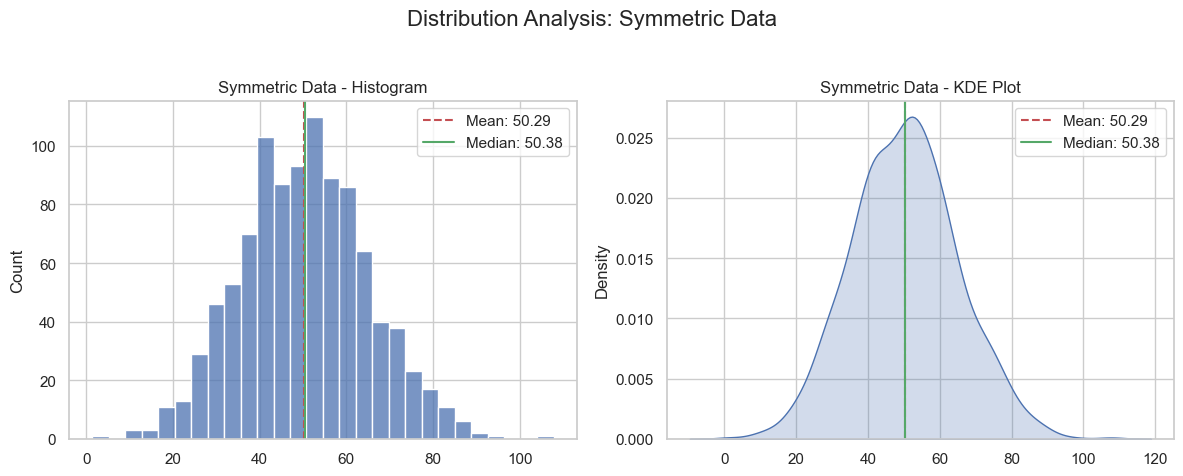

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# --- Generate Sample Data ---

# 1. Symmetric Data (e.g., Normally distributed)
np.random.seed(42) # for reproducibility
symmetric_data = np.random.normal(loc=50, scale=15, size=1000) # Mean=50, StdDev=15

# 2. Right-Skewed Data (Positive Skew)
# Using log-normal distribution, often models variables like income or charges
right_skewed_data = np.random.lognormal(mean=3.5, sigma=0.8, size=1000)

# 3. Left-Skewed Data (Negative Skew)
# Using a Beta distribution with specific parameters (a > b)
# We'll scale it to a different range for visual clarity
left_skewed_data = np.random.beta(a=5, b=1.5, size=1000) * 100

# --- Plotting Function (optional, but keeps code DRY) ---
def plot_distribution(data, title_prefix):
    """Plots histogram and KDE for the given data."""
    fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

    # Histogram
    sns.histplot(data, bins='auto', kde=False, ax=ax[0])
    ax[0].set_title(f'{title_prefix} - Histogram')
    ax[0].axvline(np.mean(data), color='r', linestyle='--', linewidth=1.5, label=f'Mean: {np.mean(data):.2f}')
    ax[0].axvline(np.median(data), color='g', linestyle='-', linewidth=1.5, label=f'Median: {np.median(data):.2f}')
    ax[0].legend()


    # KDE Plot
    sns.kdeplot(data, ax=ax[1], fill=True) # Added fill for clarity
    ax[1].set_title(f'{title_prefix} - KDE Plot')
    ax[1].axvline(np.mean(data), color='r', linestyle='--', linewidth=1.5, label=f'Mean: {np.mean(data):.2f}')
    ax[1].axvline(np.median(data), color='g', linestyle='-', linewidth=1.5, label=f'Median: {np.median(data):.2f}')
    ax[1].legend()

    fig.suptitle(f'Distribution Analysis: {title_prefix}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

# --- Create and Explain Plots ---

# 1. Symmetric Data Plot
plot_distribution(symmetric_data, 'Symmetric Data')

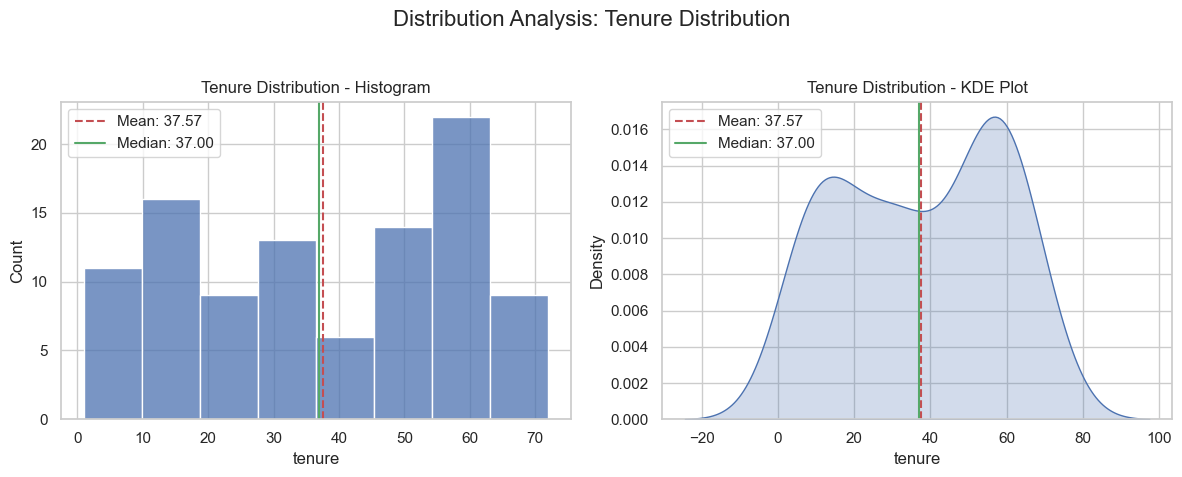

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns
title_prefix = "Tenure Distribution"
# Histogram
sns.histplot(df["tenure"], bins='auto', kde=False, ax=ax[0])
ax[0].set_title(f'{title_prefix} - Histogram')
ax[0].axvline(np.nanmean(df["tenure"]), color='r', linestyle='--', linewidth=1.5, label=f'Mean: {np.nanmean(df["tenure"]):.2f}')
ax[0].axvline(np.nanmedian(df["tenure"]), color='g', linestyle='-', linewidth=1.5, label=f'Median: {np.nanmedian(df["tenure"]):.2f}')
ax[0].legend()


# KDE Plot
sns.kdeplot(df["tenure"], ax=ax[1], fill=True) # Added fill for clarity
ax[1].set_title(f'{title_prefix} - KDE Plot')
ax[1].axvline(np.nanmean(df["tenure"]), color='r', linestyle='--', linewidth=1.5, label=f'Mean: {np.nanmean(df["tenure"]):.2f}')
ax[1].axvline(np.nanmedian(df["tenure"]), color='g', linestyle='-', linewidth=1.5, label=f'Median: {np.nanmedian(df["tenure"]):.2f}')
ax[1].legend()

fig.suptitle(f'Distribution Analysis: {title_prefix}', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

**Explanation for Right-Skewed Data Plot:**
- **Histogram:** The tallest bars are clustered on the left side (lower values). The bars gradually get shorter as you move to the right, forming a long tail extending towards the higher values. This indicates that most data points have lower values, but a few have significantly higher values.
- **KDE Plot:** The smooth curve has its peak shifted to the left. The curve slopes down much more gradually on the right side, forming that extended tail towards higher values.
- **Mean vs. Median:** Observe that the Mean (red dashed line) is greater than the Median (green solid line). The mean is pulled towards the right by the high-value outliers in the tail.
- **Telecom Context:** This shape is highly characteristic of what we'd expect for **TotalCharges** or potentially **tenure**. Many customers have lower total charges/tenure, while fewer customers stick around for a long time, accumulating very high total charges.

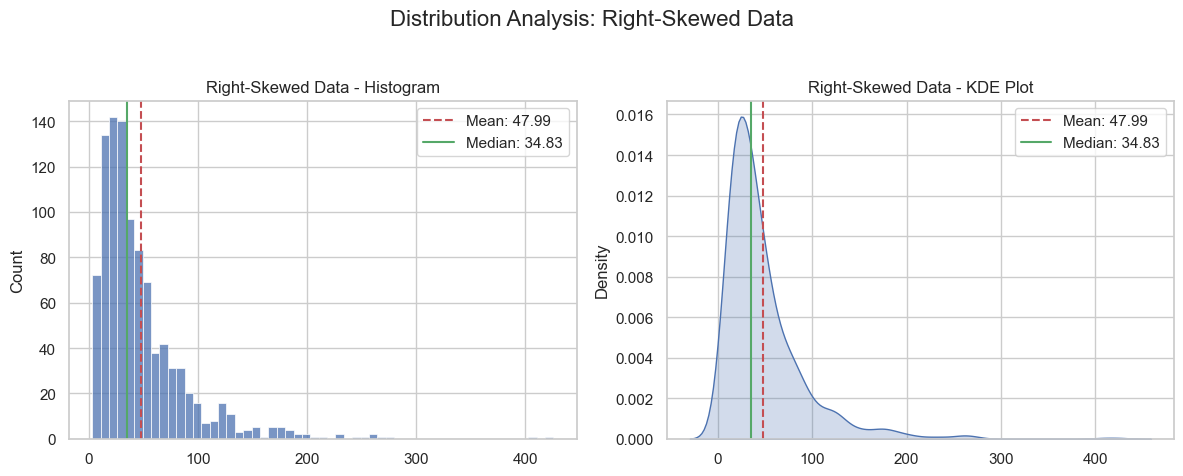

In [56]:
plot_distribution(right_skewed_data, "Right-Skewed Data")

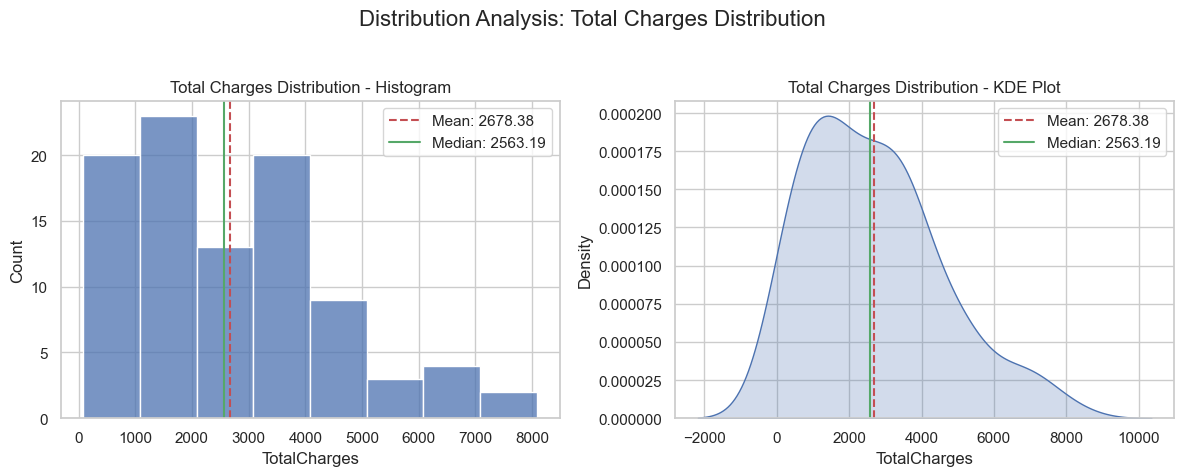

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns
title_prefix = "Total Charges Distribution"
# Histogram
sns.histplot(pd.to_numeric(df["TotalCharges"], errors="coerce"), bins='auto', kde=False, ax=ax[0])
ax[0].set_title(f'{title_prefix} - Histogram')
ax[0].axvline(np.nanmean(pd.to_numeric(df["TotalCharges"], errors="coerce")), color='r', linestyle='--', linewidth=1.5, label=f'Mean: {np.nanmean(pd.to_numeric(df["TotalCharges"], errors="coerce")):.2f}')
ax[0].axvline(np.nanmedian(pd.to_numeric(df["TotalCharges"], errors="coerce")), color='g', linestyle='-', linewidth=1.5, label=f'Median: {np.nanmedian(pd.to_numeric(df["TotalCharges"], errors="coerce")):.2f}')
ax[0].legend()


# KDE Plot
sns.kdeplot(pd.to_numeric(df["TotalCharges"], errors="coerce"), ax=ax[1], fill=True) # Added fill for clarity
ax[1].set_title(f'{title_prefix} - KDE Plot')
ax[1].axvline(np.nanmean(pd.to_numeric(df["TotalCharges"], errors="coerce")), color='r', linestyle='--', linewidth=1.5, label=f'Mean: {np.nanmean(pd.to_numeric(df["TotalCharges"], errors="coerce")):.2f}')
ax[1].axvline(np.nanmedian(pd.to_numeric(df["TotalCharges"], errors="coerce")), color='g', linestyle='-', linewidth=1.5, label=f'Median: {np.nanmedian(pd.to_numeric(df["TotalCharges"], errors="coerce")):.2f}')
ax[1].legend()

fig.suptitle(f'Distribution Analysis: {title_prefix}', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

**Explanation for Left-Skewed Data Plot:**
- **Histogram:** The tallest bars are clustered on the right side (higher values). The bars gradually get shorter as you move to the left, forming a long tail extending towards the lower values. This indicates that most data points have higher values, but a few have significantly lower values.
- **KDE Plot:** The smooth curve has its peak shifted to the right. The curve slopes down much more gradually on the left side, forming that extended tail towards lower values.
- **Mean vs. Median:** Observe that the Mean (red dashed line) is less than the Median (green solid line). The mean is pulled towards the left by the low-value outliers in the tail.
- **Telecom Context:** Left skew is often less common for typical telecom metrics like charges or tenure. However, you might encounter it in specific scenarios, perhaps customer satisfaction scores (if most customers are highly satisfied, creating a peak at the high end with a tail of dissatisfied customers), or maybe the remaining contract duration for customers on 2-year plans (most would be closer to the end, fewer near the beginning).

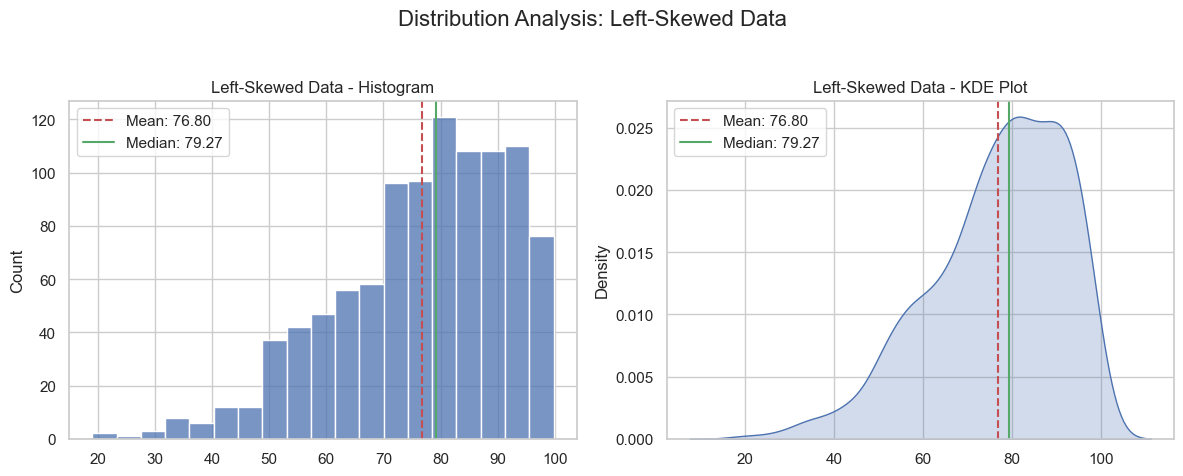

In [59]:
# 3. Left-Skewed Data Plot
plot_distribution(left_skewed_data, "Left-Skewed Data")

### Summary
| Plot Type | How to Identify Skewness | Right Skew Appearance | Left Skew Appearance |
| --- | --- | --- | --- |
| Histogram | Look at the length and tapering of the tails relative to the main peak(s). | Tall bars on left, long tail of short bars to the right. | Tall bars on right, long tail of short bars to the left.
| KDE Plot | Look at the extension and slope of the tails relative to the main peak(s) of the curve. | Peak shifted left, long gentle slope/tail to the right. | Peak shifted right, long gentle slope/tail to the left.

### Why Median was Used for TotalCharges (Instead of Mean)?
The choice between using the mean, median, or mode for imputing missing values depends heavily on the type of data and its distribution.

1. **Sensitivity to Outliers and Skewness:** The **mean** is calculated by summing all values and dividing by the count. This makes it very sensitive to extreme values (outliers). If a few customers have exceptionally high **TotalCharges** (perhaps due to very long tenure or high monthly plans), they can pull the mean significantly higher than what might be considered "typical".

2. **Robustness of the Median:** The **median** is the middle value when the data is sorted. It's not affected by how large the extreme values are, only by their position. If the **TotalCharges** distribution is skewed (which is common for monetary values – lots of lower values and a tail of higher values), the median often gives a better representation of the central tendency for the *majority* of the customers.

3. **Likely Skewness in Financial Data:** Variables like charges, income, or spending often exhibit right-skew (a long tail towards higher values). In such cases, the mean will be greater than the median. Using the mean for imputation would insert a value influenced by these high extremes, potentially distorting the overall distribution more than using the median would.

4. **EDA Informs the Choice:** Although we didn't explicitly plot the *original* distribution of **TotalCharges** before imputation in the example flow (we plotted it after cleaning), a typical EDA process would involve:
    - Attempting the numeric conversion (**pd.to_numeric(errors='coerce')**).
    - *Then*, plotting a histogram/boxplot of the now-numeric **TotalCharges** (with NaNs still present or temporarily ignored for the plot).
    - Observing the plot for skewness or obvious outliers.
    - *Based* on that observation, choosing median (if skewed/outliers) or mean (if roughly symmetric).

In essence, the median was chosen as a **safer, more robust** option for TotalCharges because financial data like this is often skewed, and the median is less affected by potentially extreme values than the mean.


### Layout: When to Use Mean vs. Median vs. Mode for Imputation

1. Identify the Variable Type:
- Numerical: Data that represents quantities (e.g., tenure, MonthlyCharges, TotalCharges, age, height).
    - Continuous: Can take any value within a range (e.g., charges, height).
    - Discrete: Can only take specific, separate values (e.g., tenure in months, number of dependents).
- Categorical: Data that represents groups or labels (e.g., gender, InternetService, Contract, PaymentMethod).
    - Nominal: Categories with no inherent order (e.g., gender, payment method).
    - Ordinal: Categories with a meaningful order (e.g., education level 'High School' < 'Bachelor's' < 'Master's', contract type if ordered by length).

2. Analyze the Distribution (Crucial for Numerical Data):
- Use EDA Step 3 (*Univariate Analysis*) visualizations:
    - Histograms (**sns.histplot**): Look at the shape. Is it bell-shaped (symmetric/normal)? Is it skewed (lopsided) to the left or right? Are there multiple peaks (multimodal)?
    - Box Plots (**sns.boxplot**): Check the position of the median (the line inside the box) relative to the quartiles (the box edges). Is it centered? Look for points plotted outside the "whiskers" – these are potential outliers.
    - Density Plots (**sns.kdeplot**): Similar to histograms but provides a smooth curve estimate of the distribution shape.
    - Skewness Metric (**df['column'].skew()**): Calculate the skewness value.
        - Roughly 0: Symmetric
        - Significantly positive (> 0.5 or 1): Right-skewed (tail to the right)
        - Significantly negative (< -0.5 or -1): Left-skewed (tail to the left)

3. Choose the Imputation Strategy:

- IF Categorical Data (Nominal or Ordinal):
    - USE: Mode (the most frequent category).
    - Why: Mean and median are mathematically meaningless for categories like 'DSL' or 'Female'. The mode represents the most common occurrence.
    - Example: Imputing missing gender, PaymentMethod.
    - Python: df['categorical_column'].fillna(df['categorical_column'].mode()[0], inplace=True) (Use [0] because .mode() can return multiple modes if frequencies are tied).

- IF Numerical Data & Distribution is Approximately Symmetric & Few/No Significant Outliers:
    - USE: Mean (the average value).
    - Why: The mean incorporates information from all data points and is a good measure of central tendency for symmetric distributions.
    - Example: Imputing age in a dataset where age is normally distributed.
    - Python: df['numerical_column'].fillna(df['numerical_column'].mean(), inplace=True)

- IF Numerical Data & Distribution is Skewed OR Significant Outliers are Present:
    - USE: Median (the middle value).
    - Why: The median is robust – it's not easily pulled by extreme values or the long tail of a skewed distribution. It often better represents the "typical" value in these cases.
    - Example: Imputing TotalCharges, income, house prices.
    - Python: df['numerical_column'].fillna(df['numerical_column'].median(), inplace=True)

**Summary Table**
| Data Type | Distribution / Characteristics | Recommended Imputation Method | Rationale |
| --- | --- | --- | --- |
| Categorical | Nominal or Ordinal | Mode | 	Mean/Median not applicable; represents most common.
| Numerical | Symmetric, Few/No Outliers | Mean | Uses all data points, good for symmetric.
| Numerical | Skewed OR Presence of Outliers | Median | Robust to extremes, better represents typical value in skewed data.

**Important Considerations:**
- **Context Matters:** Always think if the imputed value makes sense in the real-world context of the variable.
- **Amount of Missing Data:** If a very large percentage of data is missing, imputation might be unreliable, and dropping the column or using more advanced techniques might be necessary.
- **Advanced Methods:** Simple mean/median/mode imputation is easy but basic. More sophisticated methods exist (like regression imputation, K-Nearest Neighbors imputation) that use relationships between variables to make a more informed guess for the missing value. These are often used later in the modeling pipeline.

### Dropping Rows or Columns
Deciding whether to drop rows or columns is a critical step in data cleaning. Doing it unnecessarily means losing potentially valuable information, but keeping problematic data can skew your analysis and wreck your models. Here’s a breakdown of contexts and things to look for:

#### Dropping Rows (Observations)
1. **Missing Target Value**
    - **Context:** If the column you are trying to predict (the dependent variable, e.g., Churn in the telecom example) is missing for a particular row.
    - **Thing to Look For:** df['target_column'].isnull().sum()
    - **Why Drop:** For supervised learning, an observation without a known outcome is usually unusable for training or evaluation.
    - **Caveat:** If you're doing unsupervised learning (like clustering), you might keep the row if other features are present.

2. **Excessive Missing Values in a Single Row:**
    - **Context:** If a specific row (observation) is missing values across many different columns.
    - **Thing to Look For:** Calculate the percentage of missing values per row: df.isnull().mean(axis=1) * 100. Set a high threshold (e.g., >50-70% missing).
    - **Why Drop:** This row likely holds very little information and imputing so many values would be highly speculative and might introduce more noise than signal.
    - **Caveat:** Ensure the missingness isn't systematic for a subgroup you care about.

3. **Duplicate Rows:**
    - **Context:** When the exact same row appears multiple times in the dataset.
    - **Thing to Look For:** df.duplicated().sum(). You might check duplicates based on all columns or a subset of key identifier columns (e.g., customerID if available and supposed to be unique).
    - **Why Drop:** Duplicate rows don't add new information and can artificially inflate certain statistics or bias model training towards those specific duplicated entries.
    - **Caveat:** Ensure they are true duplicates. Sometimes repeated entries are valid (e.g., multiple transactions for the same customer ID in a different type of dataset).

4. **Irrelevant Observations:**
    - **Context:** Rows that clearly do not belong to the population or time frame you are analyzing.
    - **Thing to Look For:** Values in certain columns indicating exclusion criteria (e.g., customer_type == 'Business' when analyzing residential, record_date < '2024-01-01' if analyzing data from 2024 onwards). Requires domain knowledge.
    - **Why Drop:** Including data outside the scope of your analysis question leads to incorrect conclusions for the target population.

5. **Confirmed Data Entry Errors / Corrupt Rows:**
    - **Context:** Rows containing values that are clearly impossible or nonsensical, indicating a fundamental error in data collection or entry for that specific observation. This goes beyond typical outliers.
    - **Thing to Look For:** Illogical combinations (e.g., Age = 5 and Job = 'Doctor'), dates in the future, text where numbers should be (after attempting cleaning), obviously corrupted characters.
    - **Why Drop:** The integrity of the data for that row is compromised, making it unreliable.

6. **Outliers (Use Extreme Caution!):**
    - **Context:** Rows with one or more values that are extremely different from the rest.
    - **Thing to Look For:** Values falling far outside the range seen in box plots or identified via statistical methods (e.g., Z-score, IQR).
    - **Why Drop (Rarely!):** Only drop if you can confirm the outlier is due to a measurement error, data entry mistake, or belongs to a different population not relevant to your study.
    - **Why NOT Drop (Usually):** Genuine extreme values often contain critical information (e.g., highest spending customers, fraudulent activity). Dropping them can severely bias your results and hide important insights. Prefer transformation (e.g., log transform) or using robust statistical methods/models.

#### Dropping Columns (Features)
1. **Very High Percentage of Missing Values:**
    - **Context:** A column where a significant majority of the values are missing.
    - **Thing to Look For:** Calculate the percentage of missing values per column: (df.isnull().sum() / len(df)) * 100. Common thresholds might be > 50%, 70%, or even higher depending on context.
    - **Why Drop:** If most data is missing, the column provides little information. Imputation might be highly unreliable and essentially "invent" most of the data for that feature.
    - **Caveat:** Before dropping, investigate why it's missing. Is the missingness itself informative (e.g., missing 'OnlineBackup' details might imply 'No Internet Service')? If so, you might create a binary feature like OnlineBackup_isMissing before dropping the original.

2. **Zero or Near-Zero Variance:**
    - **Context:** A column where all values are the same (zero variance) or almost all values are the same (near-zero variance).
    - **Thing to Look For:** df['column_name'].nunique(). If unique count is 1, it has zero variance. Check value_counts() for near-zero variance (e.g., one value makes up 99.9% of the data).
    - **Why Drop:** These columns are constants (or almost constants) and provide no useful information for distinguishing between observations or for predictive modeling.
    - **Example:** A 'Country' column if all customers in the dataset are from India.

3. **Irrelevance / No Predictive Power:**
    - **Context:** Columns that, based on domain knowledge or initial exploration, have no logical connection to the problem you're trying to solve or the target variable.
    - **Thing to Look For:** Requires judgment. Does this feature plausibly influence Churn?
    - **Why Drop:** Simplifies the dataset and model, reduces noise, and can improve computational efficiency without losing predictive power.
    - **Example:** customerID (useful identifier but doesn't predict churn), maybe arbitrary row numbers added during import, internal tracking codes unrelated to customer behavior.

4. **Data Leakage:**
    - **Context:** Columns that contain information about the target variable that would not be available at the time you would typically make a prediction in a real-world scenario.
    - **Thing to Look For:** Features that are essentially a proxy for the target, or were generated after the target event occurred.
    - **Why Drop:** Including these leads to artificially inflated model performance that will not generalize to new, unseen data.
    - **Example:** A column named ChurnDate when predicting Churn (Yes/No), or ReasonCustomerCalledAboutLeaving if recorded only when they actually churn.

5. **High Cardinality Issues:**
    - **Context:** Categorical columns with a very large number of unique values (e.g., hundreds or thousands).
    - **Thing to Look For:** df['categorical_column'].nunique().
    - **Why Drop (Sometimes):** Can be problematic for certain modeling techniques (like one-hot encoding, which would create too many new columns).
    - **Alternatives Preferred:** Often better to handle via feature engineering (e.g., grouping rare categories into 'Other', target encoding, extracting meaningful patterns) rather than dropping entirely, unless the column is also irrelevant (like a free-text comment field you don't plan to use NLP on).

6. **Redundancy / High Multicollinearity:**
    - **Context:** When two columns provide very similar information (highly correlated).
    - **Thing to Look For:** Correlation matrix (df.corr()) showing very high correlation (e.g., > 0.9 or < -0.9) between two predictor variables.
    - **Why Drop (One of them):** Can make interpretation of some models difficult (e.g., linear regression coefficients become unstable). Might be redundant information.
    - **Caveat:** Tree-based models (like Random Forest, Gradient Boosting) are generally robust to multicollinearity. Dropping might not be necessary or even desirable if both features contribute slightly different nuances. Often addressed during feature selection phase rather than initial cleaning, unless the redundancy is obvious (e.g., temperature in Celsius and Fahrenheit in the same dataset).

#### General Advice
- **Drop Cautiously:** Dropping data is irreversible and means losing information. Always have a strong justification.
- **Document:** Keep a record of which rows/columns you dropped and why.
- **Consider Alternatives:** Before dropping, always consider alternatives like imputation (for missing values), transformation (for outliers), or feature engineering (for high cardinality/redundancy).
- **Impact:** Assess the potential impact of dropping data on your sample size and the representativeness of your dataset.

# Back To EDA Process

In [4]:
df = pd.read_csv("Telecom_churn.csv")
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,8O5FU65S,Female,0,Yes,No,9,Yes,Fiber optic,Two year,Electronic check,38.26,725.81,Yes
1,1,614U7ONS,Female,0,Yes,No,22,Yes,Fiber optic,Month-to-month,Mailed check,46.63,1535.93,No
2,2,OFIT7ZR1,Male,0,No,No,27,Yes,DSL,One year,Bank transfer (automatic),119.93,196.98,No
3,3,I5FN1XML,Female,0,No,No,10,Yes,Fiber optic,Month-to-month,Mailed check,45.34,4051.5,No
4,4,SU0SXZ1R,Female,0,Yes,Yes,61,No,Fiber optic,One year,Mailed check,51.54,1284.16,Yes


## Step 1: Initial Data Inspection (The First Glance)
**Goal:** Get a basic feel for the data: its size, column names, data types, and a peek at the actual values.

In [5]:
# View Dimension
df.shape

(100, 14)

In [6]:
# View columns
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'InternetService', 'Contract',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [9]:
df.shape

(100, 13)

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'InternetService', 'Contract',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# Check data types and Non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       100 non-null    object 
 1   gender           98 non-null     object 
 2   SeniorCitizen    100 non-null    int64  
 3   Partner          100 non-null    object 
 4   Dependents       100 non-null    object 
 5   tenure           100 non-null    int64  
 6   PhoneService     100 non-null    object 
 7   InternetService  100 non-null    object 
 8   Contract         100 non-null    object 
 9   PaymentMethod    100 non-null    object 
 10  MonthlyCharges   97 non-null     float64
 11  TotalCharges     95 non-null     object 
 12  Churn            100 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 10.3+ KB


In [12]:
# Preview data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8O5FU65S,Female,0,Yes,No,9,Yes,Fiber optic,Two year,Electronic check,38.26,725.81,Yes
1,614U7ONS,Female,0,Yes,No,22,Yes,Fiber optic,Month-to-month,Mailed check,46.63,1535.93,No
2,OFIT7ZR1,Male,0,No,No,27,Yes,DSL,One year,Bank transfer (automatic),119.93,196.98,No
3,I5FN1XML,Female,0,No,No,10,Yes,Fiber optic,Month-to-month,Mailed check,45.34,4051.5,No
4,SU0SXZ1R,Female,0,Yes,Yes,61,No,Fiber optic,One year,Mailed check,51.54,1284.16,Yes


In [13]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
95,6PXEMLE4,Male,0,Yes,No,61,Yes,DSL,Month-to-month,Credit card (automatic),84.68,1847.55,No
96,113R08ZR,Female,0,No,No,58,Yes,Fiber optic,Month-to-month,Electronic check,20.60,1063.47,No
97,6Y4B65RQ,Male,0,Yes,No,54,Yes,Fiber optic,Month-to-month,Mailed check,24.49,7025.74,Yes
98,7G83L8KD,Female,0,No,Yes,34,Yes,Fiber optic,Month-to-month,Mailed check,40.55,4158.49,No
99,Y5T4DACV,Male,0,No,No,7,Yes,Fiber optic,One year,Credit card (automatic),70.27,4458.72,No


In [ ]:
# Basic Statistical Summary for numerical columns
df.describe()
# What to Look For: Huge differences between mean and median (suggests skewness)? 
# Unrealistic min/max values (e.g., negative charges)? Standard deviation relative to the mean.

,SeniorCitizen,tenure,MonthlyCharges
count,100.000000,100.000000,97.000000
mean,0.200000,37.570000,70.084536
std,0.402015,21.309767,30.135077
min,0.000000,1.000000,18.140000
25%,0.000000,17.750000,47.980000
50%,0.000000,37.000000,68.700000
75%,0.000000,56.250000,97.150000
max,1.000000,72.000000,119.930000


In [ ]:
# Basic Summary for categorical columns
df.describe(include=["object", "category"])
# What to Look For: How many unique values per category? Is there one dominant category?

,customerID,gender,Partner,Dependents,PhoneService,InternetService,Contract,PaymentMethod,TotalCharges,Churn
count,100,98,100,100,100,100,100,100,95,100
unique,100,2,2,2,2,3,3,4,95,2
top,8O5FU65S,Female,No,No,Yes,Fiber optic,Month-to-month,Electronic check,725.81,No
freq,1,55,55,70,90,46,51,30,1,77


## Step 2: Data Cleaning
**Goal:** Handle issues identified in Step 1, like missing values, incorrect data types, or duplicates, to make the data usable for analysis.

### Handling Missing Values 

In [ ]:
df.isnull().sum() # or df.isna().sum()

customerID         0
gender             2
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
InternetService    0
Contract           0
PaymentMethod      0
MonthlyCharges     3
TotalCharges       5
Churn              0
dtype: int64

In [17]:
# Let's go column by column
# First TotalCharges
df["TotalCharges"].dtype

dtype('O')

In [ ]:
# Now convert this to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce") # this replaces empty values with NaN
df["TotalCharges"].dtype

dtype('float64')

In [21]:
df[df["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
29,08DPPUZ9,Male,0,Yes,No,53,Yes,No,One year,Credit card (automatic),94.79,NaN,No
32,HMQXC3MS,Female,0,No,No,47,No,No,Two year,Mailed check,67.75,NaN,No
51,ZADZ66HT,Female,0,No,Yes,47,Yes,Fiber optic,Two year,Credit card (automatic),82.92,NaN,Yes
55,SYVK65UT,Female,1,No,No,56,Yes,Fiber optic,One year,Bank transfer (automatic),44.48,NaN,No
82,D3S44IMN,Female,1,No,No,34,Yes,No,One year,Credit card (automatic),NaN,NaN,No
85,HVDKHIZB,Female,0,Yes,Yes,56,Yes,DSL,Month-to-month,Bank transfer (automatic),58.27,NaN,No


Mean: 2678.381382978723
Median: 2563.19


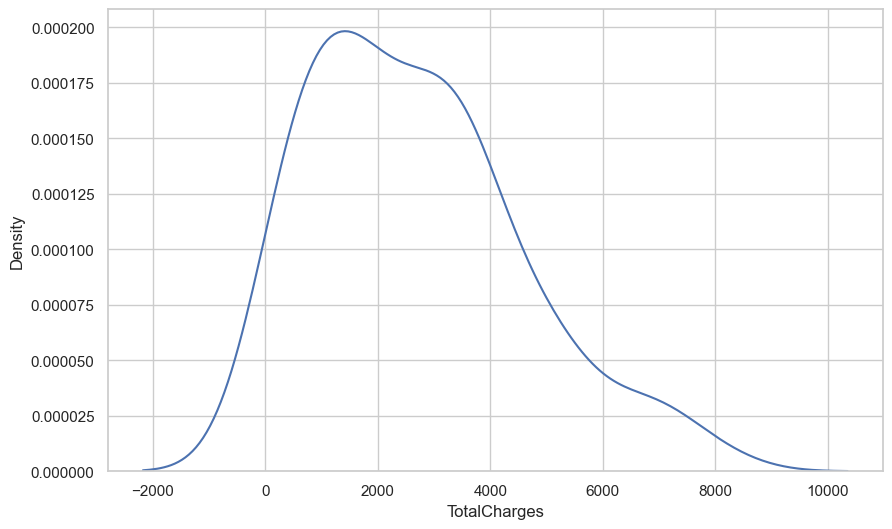

In [27]:
# Since tenure is not small/0 so mean/median will work to impute the column
# Create a kde plot to check the skewness and also calculate mean and median
print(f"Mean: {df['TotalCharges'].mean()}")
print(f"Median: {df['TotalCharges'].median()}")
sns.kdeplot(data=df, x="TotalCharges")
plt.show()

In [28]:
# Since it is right skewed, median will work
df["TotalCharges"].fillna(value=df["TotalCharges"].median(), inplace=True)

In [30]:
df.isnull().sum()

customerID         0
gender             2
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
InternetService    0
Contract           0
PaymentMethod      0
MonthlyCharges     3
TotalCharges       0
Churn              0
dtype: int64

In [31]:
# Now we move to Monthly Charges column
df[df["MonthlyCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
49,W3R5G6E1,Female,0,Yes,No,51,Yes,Fiber optic,Month-to-month,Mailed check,NaN,1460.53,No
64,6ALFEPRR,Male,0,Yes,No,70,No,Fiber optic,One year,Mailed check,NaN,3187.67,No
82,D3S44IMN,Female,1,No,No,34,Yes,No,One year,Credit card (automatic),NaN,2563.19,No


Mean: 70.08453608247423
Median: 68.7


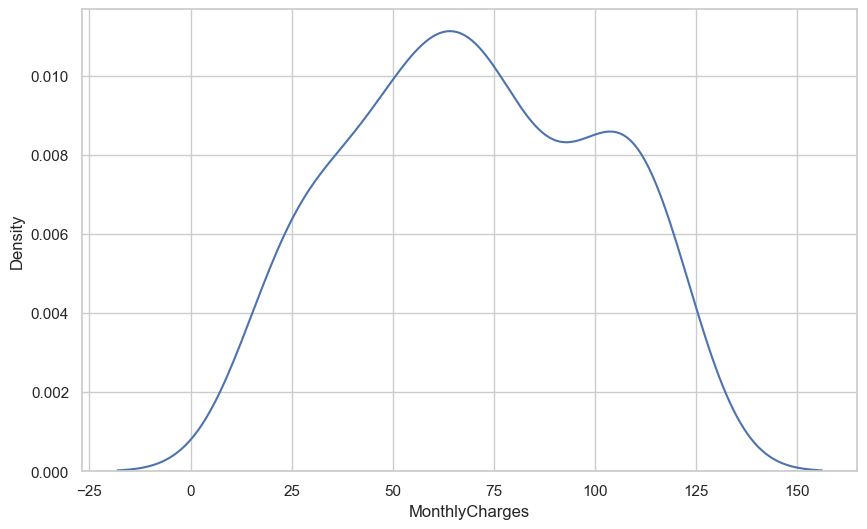

In [32]:
# Create a kde plot to check the skewness and also calculate mean and median
print(f"Mean: {df['MonthlyCharges'].mean()}")
print(f"Median: {df['MonthlyCharges'].median()}")
sns.kdeplot(data=df, x='MonthlyCharges')
plt.show()

<Axes: ylabel='MonthlyCharges'>

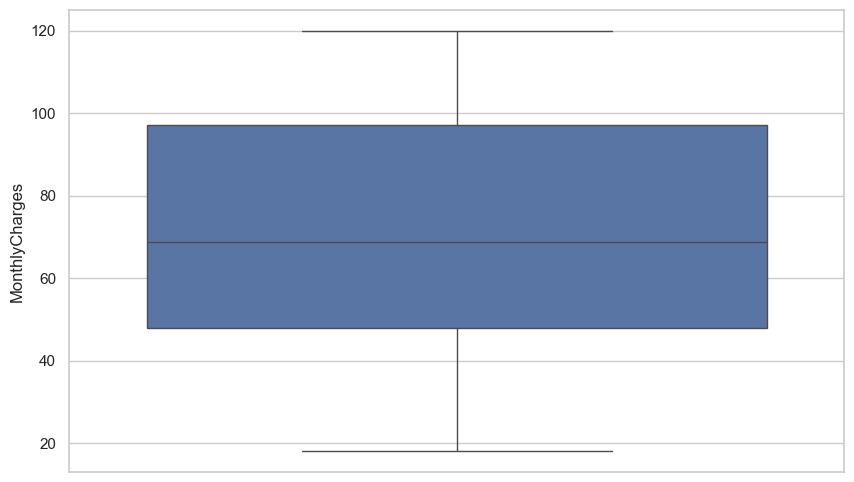

In [35]:
# Plot has no skewness and mena and median are close, let's check for outliers
sns.boxplot(data=df, y=df["MonthlyCharges"])

### Check for Outliers using Plots

Sample DataFrame created with potential outliers.
       MonthlyCharges      Tenure
count      205.000000  205.000000
mean        71.777035   36.039024
std         40.819348   22.221224
min          2.000000    1.000000
25%         52.141215   16.000000
50%         70.127836   35.000000
75%         83.048539   55.000000
max        500.000000  150.000000

--- Detecting Outliers using Box Plots ---


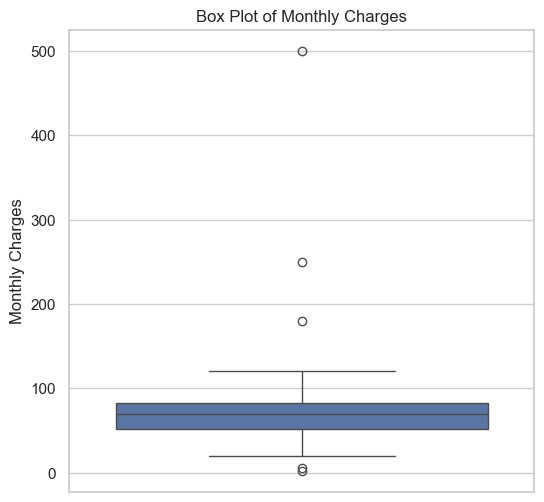

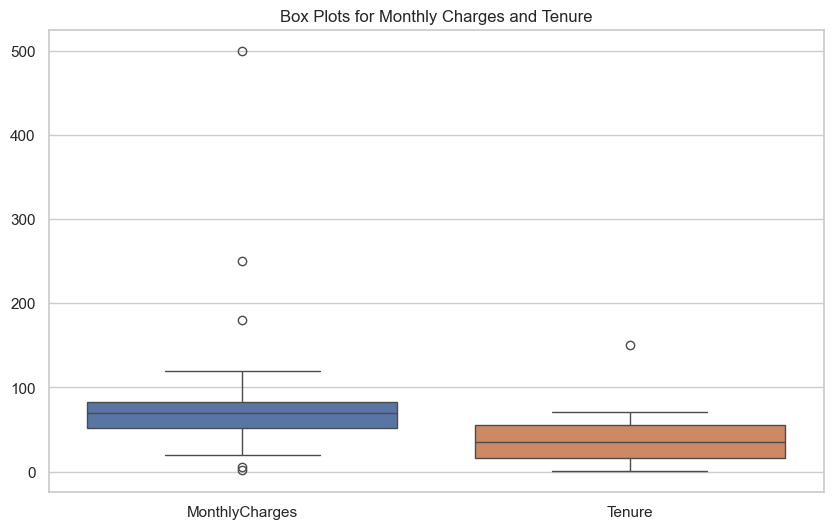


--- Supplementary Plots for Outlier Context ---


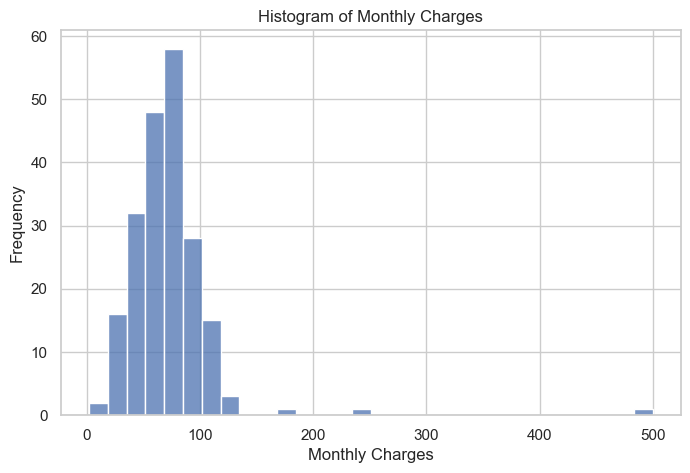

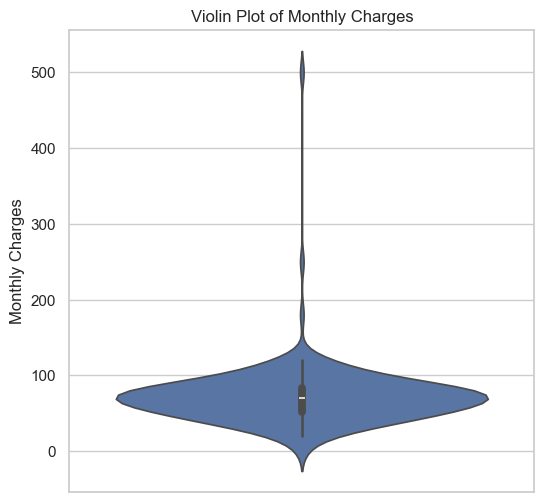

In [36]:
# --- Generate Sample Data ---
# Simulate MonthlyCharges - mostly between 20 and 120
np.random.seed(42) # for reproducibility
monthly_charges_normal = np.random.normal(loc=70, scale=25, size=200) # Mean=70, StdDev=25
monthly_charges_normal = np.clip(monthly_charges_normal, 20, 120) # Keep most values in a realistic range

# Introduce some potential outliers
outliers_low = np.array([2, 5]) # Erroneously low values?
outliers_high = np.array([180, 250, 500]) # Erroneously high values?

# Combine into a single dataset
sample_data = np.concatenate([monthly_charges_normal, outliers_low, outliers_high])
df1 = pd.DataFrame({'MonthlyCharges': sample_data})

# Let's add another column for comparison
df1['Tenure'] = np.random.randint(1, 73, size=len(df1))
# Add a Tenure outlier
df1.loc[df1.sample(1).index, 'Tenure'] = 150 # Add one tenure outlier

print("Sample DataFrame created with potential outliers.")
print(df1.describe()) # Get a statistical sense first

# --- Using Box Plots to Detect Outliers ---

print("\n--- Detecting Outliers using Box Plots ---")

# 1. Box plot for a single column ('MonthlyCharges')
plt.figure(figsize=(6, 6))
sns.boxplot(y=df1['MonthlyCharges']) # Use y for vertical orientation
plt.title('Box Plot of Monthly Charges')
plt.ylabel('Monthly Charges')
plt.grid(True, axis='y') # Add grid lines for easier reading
plt.show()

# Explanation:
# - The 'box' represents the Interquartile Range (IQR), containing the middle 50% of the data (from Q1 to Q3).
# - The horizontal line inside the box is the Median (Q2).
# - The 'whiskers' extend from the box, typically to 1.5 times the IQR away from Q1 and Q3.
#   (Points within this range are generally considered 'normal').
# - **The individual points plotted beyond the whiskers are identified as potential outliers.**
#   In this plot, you can clearly see points plotted far below the lower whisker (around 2, 5) and
#   several points far above the upper whisker (around 180, 250, 500).

# 2. Box plots for multiple numerical columns side-by-side
numerical_cols = ['MonthlyCharges', 'Tenure']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1[numerical_cols])
plt.title('Box Plots for Monthly Charges and Tenure')
plt.grid(True, axis='y')
plt.show()

# Explanation:
# - This is very useful for comparing the presence and scale of outliers across different features.
# - We see potential outliers in both 'MonthlyCharges' (as before) and 'Tenure' (the single point around 150).
# - Notice the y-axis scale adjusts to accommodate all data, which can sometimes squash the box for
#   variables with smaller ranges if another variable has very extreme outliers.

# --- Other Useful Plots (Supplementary) ---

print("\n--- Supplementary Plots for Outlier Context ---")

# 3. Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df1['MonthlyCharges'], bins=30, kde=False)
plt.title('Histogram of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

# Explanation:
# - Histograms show the frequency distribution.
# - Outliers may appear as isolated bars far away from the main bulk of the data.
# - Here, you can see the main distribution between roughly 20-120, but then small, detached bars
#   representing the frequencies of the outlier values (though the very extreme ones might be
#   hard to distinguish if the binning isn't right or if they are few).
# - It helps visualize *how* isolated the outliers are but is less precise than a box plot for identification.

# 4. Violin Plot
plt.figure(figsize=(6, 6))
sns.violinplot(y=df1['MonthlyCharges'])
plt.title('Violin Plot of Monthly Charges')
plt.ylabel('Monthly Charges')
plt.grid(True, axis='y')
plt.show()

# Explanation:
# - Violin plots combine a box plot (often shown inside or implied) with a KDE plot (showing the shape/density).
# - The width of the violin shows the density of data points.
# - Potential outliers are indicated where the violin shape extends very thinly far beyond the main body.
# - This plot also clearly shows the main density between ~20-120 and the thin extensions towards the outlier values.

In [38]:
# So no Outliers in Monthlycharges column, so mean will work
df["MonthlyCharges"].fillna(value=df["MonthlyCharges"].mean(), inplace=True)

In [39]:
df.isnull().sum()

customerID         0
gender             2
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
InternetService    0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

In [40]:
# Now let's finally move to Gender column
df[df["gender"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
15,D2AVKJQ9,NaN,0,No,No,59,Yes,DSL,One year,Bank transfer (automatic),99.35,768.59,No
83,J4W0FZBM,NaN,1,Yes,Yes,10,Yes,No,One year,Bank transfer (automatic),66.85,1141.13,No


In [43]:
# Since it is categorical column, fill it with mode
df["gender"].fillna(value=df["gender"].mode()[0], inplace=True)

In [44]:
df.isna().sum()

customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
InternetService    0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

### Correcting Data Types

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       100 non-null    object 
 1   gender           100 non-null    object 
 2   SeniorCitizen    100 non-null    int64  
 3   Partner          100 non-null    object 
 4   Dependents       100 non-null    object 
 5   tenure           100 non-null    int64  
 6   PhoneService     100 non-null    object 
 7   InternetService  100 non-null    object 
 8   Contract         100 non-null    object 
 9   PaymentMethod    100 non-null    object 
 10  MonthlyCharges   100 non-null    float64
 11  TotalCharges     100 non-null    float64
 12  Churn            100 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 10.3+ KB


In [46]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8O5FU65S,Female,0,Yes,No,9,Yes,Fiber optic,Two year,Electronic check,38.26,725.81,Yes
1,614U7ONS,Female,0,Yes,No,22,Yes,Fiber optic,Month-to-month,Mailed check,46.63,1535.93,No
2,OFIT7ZR1,Male,0,No,No,27,Yes,DSL,One year,Bank transfer (automatic),119.93,196.98,No
3,I5FN1XML,Female,0,No,No,10,Yes,Fiber optic,Month-to-month,Mailed check,45.34,4051.50,No
4,SU0SXZ1R,Female,0,Yes,Yes,61,No,Fiber optic,One year,Mailed check,51.54,1284.16,Yes


In [47]:
# Since SeniorCitizen column is categorical, converting it to object make more sense
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       100 non-null    object 
 1   gender           100 non-null    object 
 2   SeniorCitizen    100 non-null    object 
 3   Partner          100 non-null    object 
 4   Dependents       100 non-null    object 
 5   tenure           100 non-null    int64  
 6   PhoneService     100 non-null    object 
 7   InternetService  100 non-null    object 
 8   Contract         100 non-null    object 
 9   PaymentMethod    100 non-null    object 
 10  MonthlyCharges   100 non-null    float64
 11  TotalCharges     100 non-null    float64
 12  Churn            100 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 10.3+ KB


### Checking For Duplicates

In [49]:
df.duplicated().sum()

0

In [50]:
# No duplicates present, so our data is almost cleaned, save it
df.to_csv("Telecom_churn_cleaned.csv", index=False)

In [3]:
df = pd.read_csv("Telecom_churn_cleaned.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8O5FU65S,Female,0,Yes,No,9,Yes,Fiber optic,Two year,Electronic check,38.26,725.81,Yes
1,614U7ONS,Female,0,Yes,No,22,Yes,Fiber optic,Month-to-month,Mailed check,46.63,1535.93,No
2,OFIT7ZR1,Male,0,No,No,27,Yes,DSL,One year,Bank transfer (automatic),119.93,196.98,No
3,I5FN1XML,Female,0,No,No,10,Yes,Fiber optic,Month-to-month,Mailed check,45.34,4051.50,No
4,SU0SXZ1R,Female,0,Yes,Yes,61,No,Fiber optic,One year,Mailed check,51.54,1284.16,Yes


In [4]:
df.isnull().sum()

customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
InternetService    0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       100 non-null    object 
 1   gender           100 non-null    object 
 2   SeniorCitizen    100 non-null    int64  
 3   Partner          100 non-null    object 
 4   Dependents       100 non-null    object 
 5   tenure           100 non-null    int64  
 6   PhoneService     100 non-null    object 
 7   InternetService  100 non-null    object 
 8   Contract         100 non-null    object 
 9   PaymentMethod    100 non-null    object 
 10  MonthlyCharges   100 non-null    float64
 11  TotalCharges     100 non-null    float64
 12  Churn            100 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 10.3+ KB


In [6]:
df.duplicated().sum()

0

In [5]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       100 non-null    object 
 1   gender           100 non-null    object 
 2   SeniorCitizen    100 non-null    object 
 3   Partner          100 non-null    object 
 4   Dependents       100 non-null    object 
 5   tenure           100 non-null    int64  
 6   PhoneService     100 non-null    object 
 7   InternetService  100 non-null    object 
 8   Contract         100 non-null    object 
 9   PaymentMethod    100 non-null    object 
 10  MonthlyCharges   100 non-null    float64
 11  TotalCharges     100 non-null    float64
 12  Churn            100 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 10.3+ KB


## Step 3 - Univariate Analysis (Analysing Single Variables)
**Goal:** Understand the distribution and characteristics of each variable individually. *This is where you start making plots!*

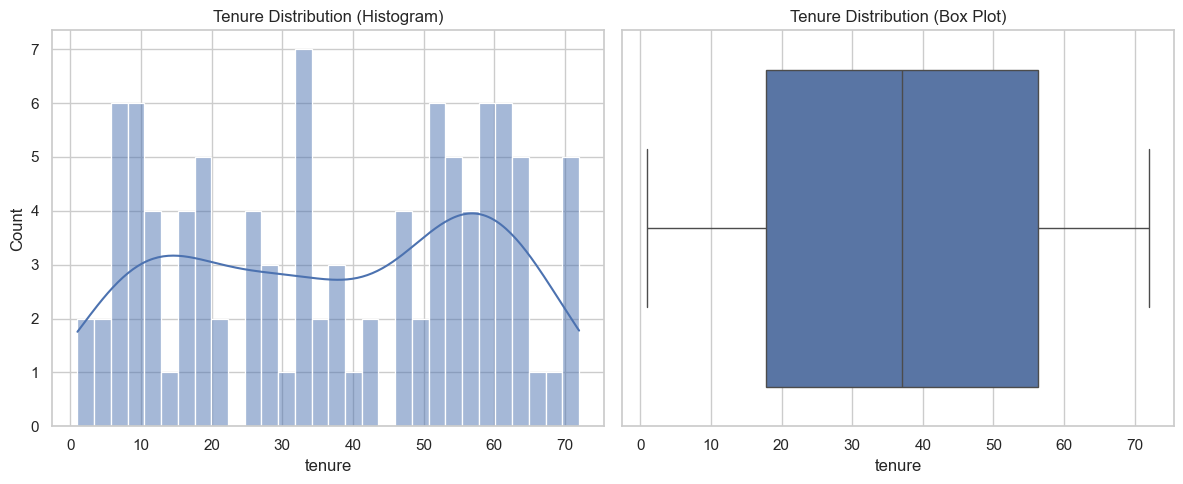


Tenure Description:
 count    100.000000
mean      37.570000
std       21.309767
min        1.000000
25%       17.750000
50%       37.000000
75%       56.250000
max       72.000000
Name: tenure, dtype: float64


In [9]:
# For Numerical Columns - Histograms, KDE plot, Box Plots
# Look for skewness (left/right), modality (uni/bi/multi-modal), spread (IQR, std dev), central tendency (mean, median), 
# and potential outliers.

# Let's see "tenure" first
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="tenure", kde=True, bins=30)
plt.title("Tenure Distribution (Histogram)")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="tenure")
plt.title("Tenure Distribution (Box Plot)")
plt.tight_layout()
plt.show()
print("\nTenure Description:\n", df["tenure"].describe())

No issues with outliers and it's a bi-modal Curve

**What is Modality ?**  
- In statistics, modality refers to the number of distinct peaks or modes in a data distribution. It describes the shape of a distribution, with unimodal distributions having one peak, bimodal having two peaks, and multimodal having three or more peaks.  
- Understanding modality is important because it can provide insights into the underlying data and influence the choice of statistical analyses and the interpretation of the results. For instance, if a distribution is bimodal, using the mean or median as a single measure of central tendency might be misleading. Instead, analyzing the two modes separately might provide a more accurate understanding of the data.

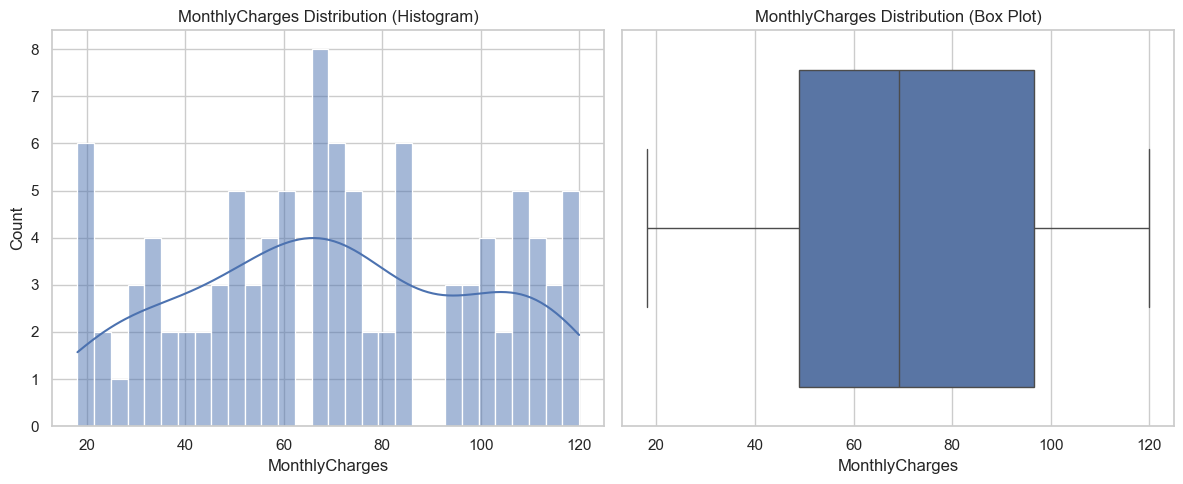


MonthlyCharges Description:
 count    100.000000
mean      70.084536
std       29.674973
min       18.140000
25%       48.902500
50%       69.225000
75%       96.535000
max      119.930000
Name: MonthlyCharges, dtype: float64


In [11]:
# Let's see MonthlyCharges
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="MonthlyCharges", kde=True, bins=30)
plt.title("MonthlyCharges Distribution (Histogram)")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="MonthlyCharges")
plt.title("MonthlyCharges Distribution (Box Plot)")
plt.tight_layout()
plt.show()
print("\nMonthlyCharges Description:\n", df["MonthlyCharges"].describe())

Evenly spread, unimodal curve, no outliers

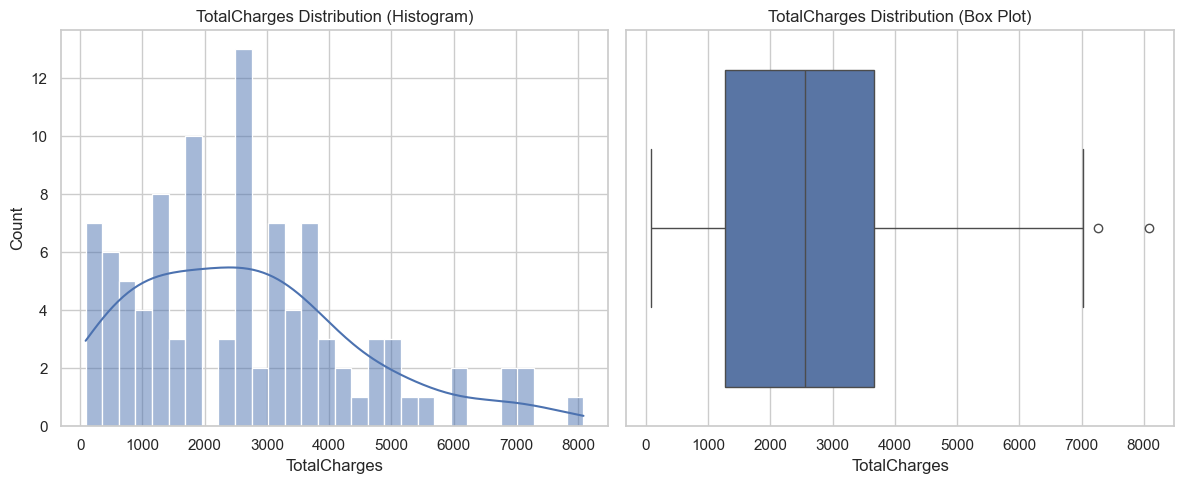


TotalCharges Description:
 count     100.000000
mean     2671.469900
std      1816.147007
min        86.750000
25%      1274.282500
50%      2563.190000
75%      3663.967500
max      8084.690000
Name: TotalCharges, dtype: float64


In [12]:
# Let's see TotalCharges
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="TotalCharges", kde=True, bins=30)
plt.title("TotalCharges Distribution (Histogram)")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="TotalCharges")
plt.title("TotalCharges Distribution (Box Plot)")
plt.tight_layout()
plt.show()
print("\nTotalCharges Description:\n", df["TotalCharges"].describe())

Right skewed, outliers present and unimodal

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       100 non-null    object 
 1   gender           100 non-null    object 
 2   SeniorCitizen    100 non-null    object 
 3   Partner          100 non-null    object 
 4   Dependents       100 non-null    object 
 5   tenure           100 non-null    int64  
 6   PhoneService     100 non-null    object 
 7   InternetService  100 non-null    object 
 8   Contract         100 non-null    object 
 9   PaymentMethod    100 non-null    object 
 10  MonthlyCharges   100 non-null    float64
 11  TotalCharges     100 non-null    float64
 12  Churn            100 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 10.3+ KB


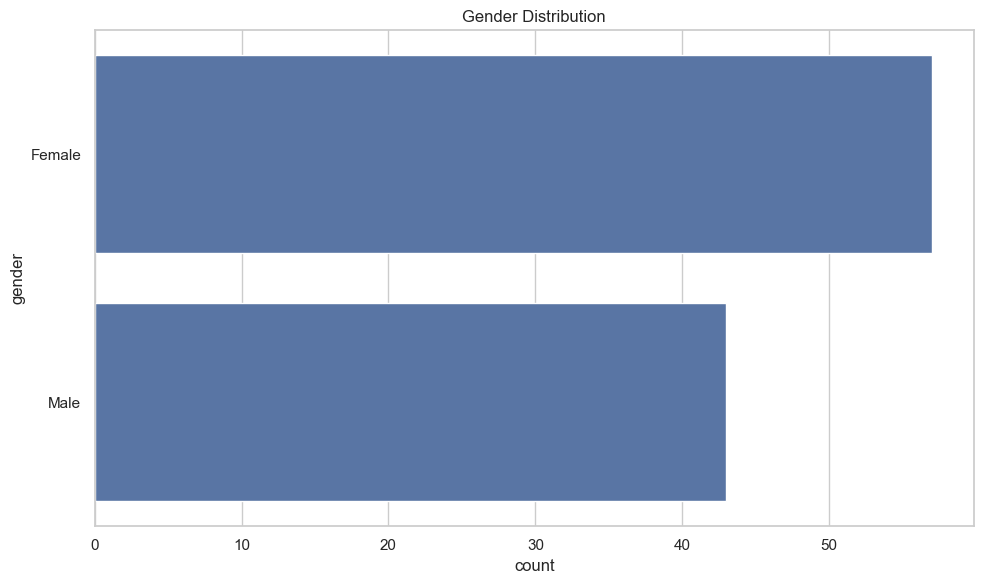


Gender Distribution
 gender
Female    57
Male      43
Name: count, dtype: int64


In [ ]:
# For Categorical Columns - Frequency Counts and Bar charts
# Look for the frequency of each category, identify dominant categories, 
# check for class imbalance (especially in the target variable Churn).

# Let's take gender column first
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="gender", order=df["gender"].value_counts().index, )
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()
print("\nGender Distribution\n", df["gender"].value_counts())

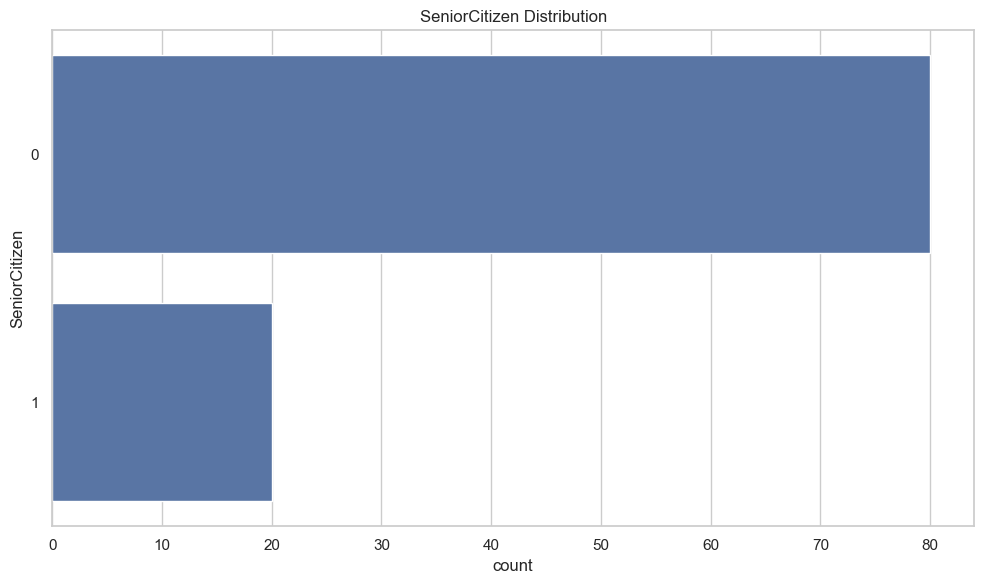

\SeniorCitizen Distribution
 SeniorCitizen
0    80
1    20
Name: count, dtype: int64


In [17]:
# "SeniorCitizen" column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="SeniorCitizen", order=df["SeniorCitizen"].value_counts().index, )
plt.title("SeniorCitizen Distribution")
plt.tight_layout()
plt.show()
print("\SeniorCitizen Distribution\n", df["SeniorCitizen"].value_counts())

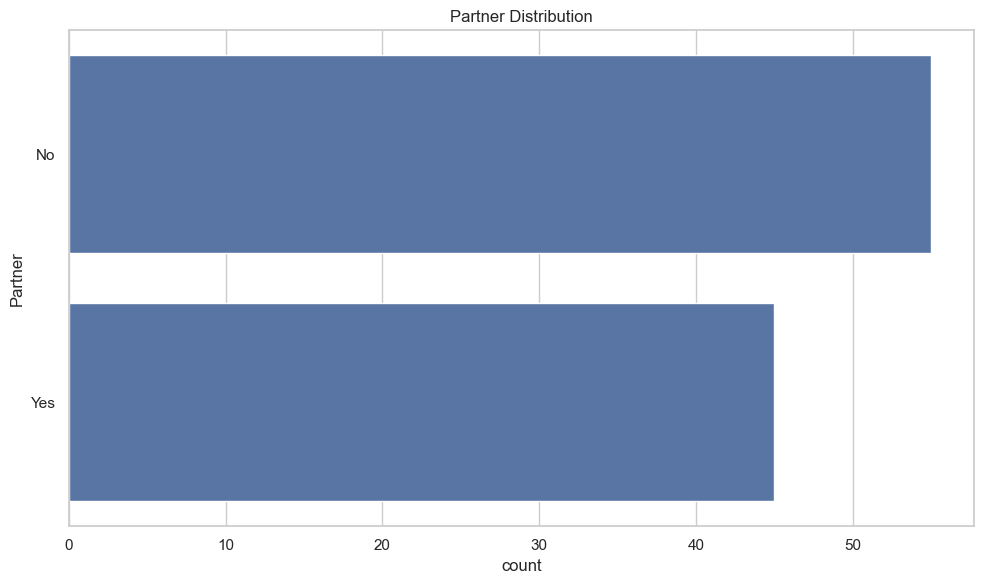


Partner Distribution
 Partner
No     55
Yes    45
Name: count, dtype: int64


In [21]:
# "Partner" column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="Partner", order=df["Partner"].value_counts().index, )
plt.title("Partner Distribution")
plt.tight_layout()
plt.show()
print("\nPartner Distribution\n", df["Partner"].value_counts())

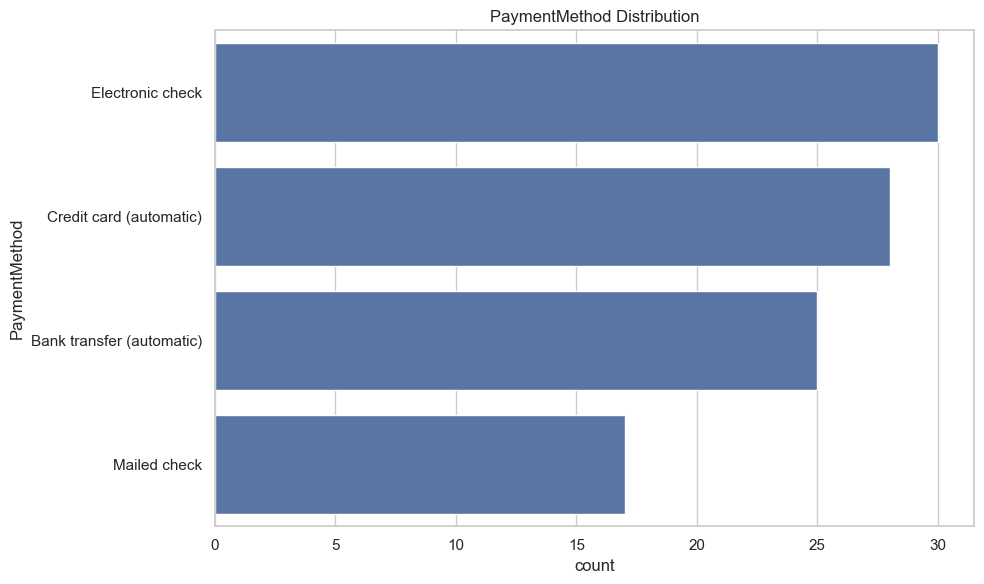


PaymentMethod Distribution
 PaymentMethod
Electronic check             30
Credit card (automatic)      28
Bank transfer (automatic)    25
Mailed check                 17
Name: count, dtype: int64


In [22]:
# "PaymentMethod" column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="PaymentMethod", order=df["PaymentMethod"].value_counts().index, )
plt.title("PaymentMethod Distribution")
plt.tight_layout()
plt.show()
print("\nPaymentMethod Distribution\n", df["PaymentMethod"].value_counts())


Contract Value Counts:
Contract
Month-to-month    51
One year          29
Two year          20
Name: count, dtype: int64


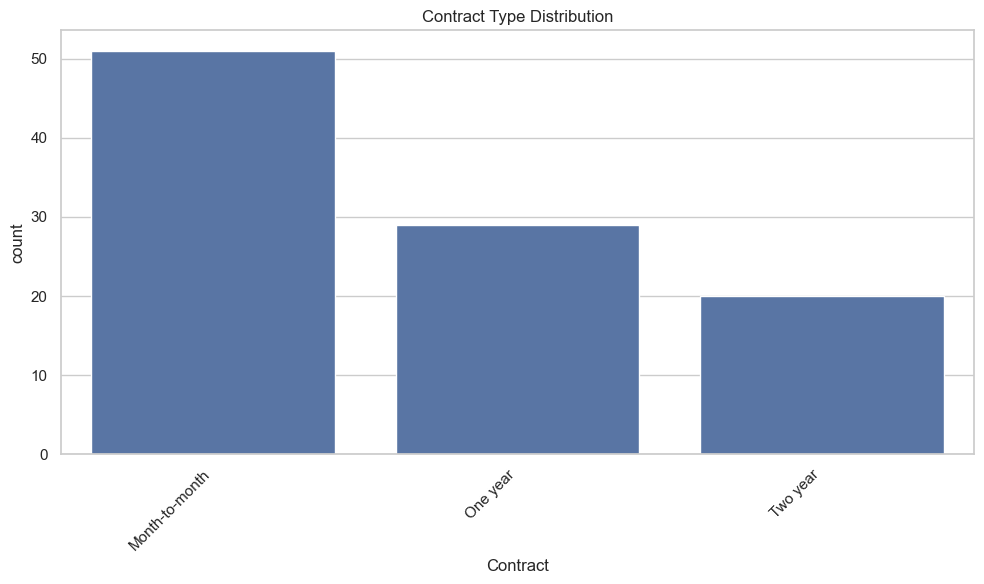

In [23]:
# Analyze 'Contract' type
print("\nContract Value Counts:")
print(df['Contract'].value_counts())
sns.countplot(x='Contract', data=df, order = df['Contract'].value_counts().index) # Order bars by frequency
plt.title('Contract Type Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Internet Service Value Counts:
InternetService
Fiber optic    46
DSL            32
No             22
Name: count, dtype: int64


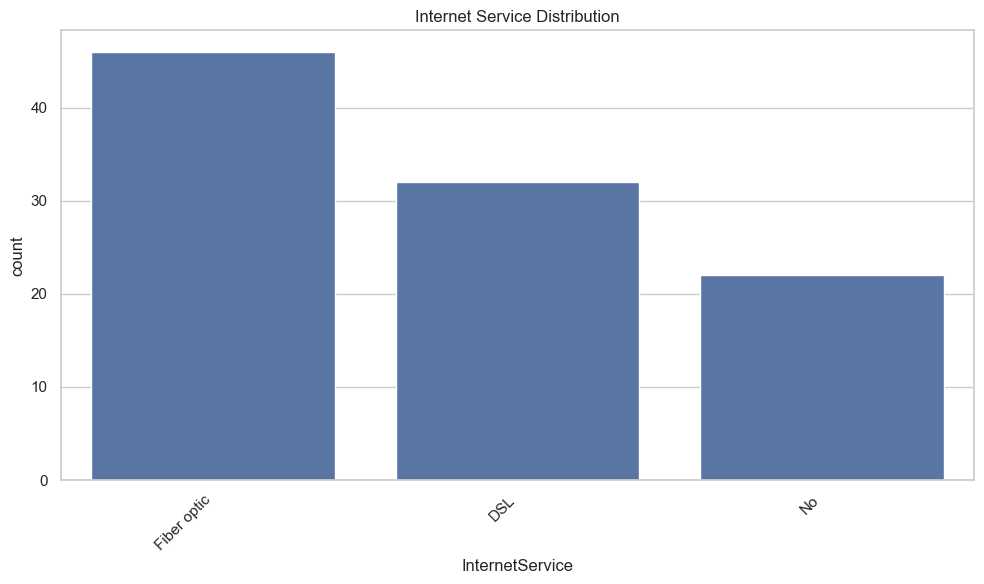

In [24]:
# Analyze 'InternetService'
print("\nInternet Service Value Counts:")
print(df['InternetService'].value_counts())
sns.countplot(x='InternetService', data=df, order = df['InternetService'].value_counts().index)
plt.title('Internet Service Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Churn Value Counts:
Churn
No     77
Yes    23
Name: count, dtype: int64

Churn Percentage:
Churn
No     77.0
Yes    23.0
Name: proportion, dtype: float64


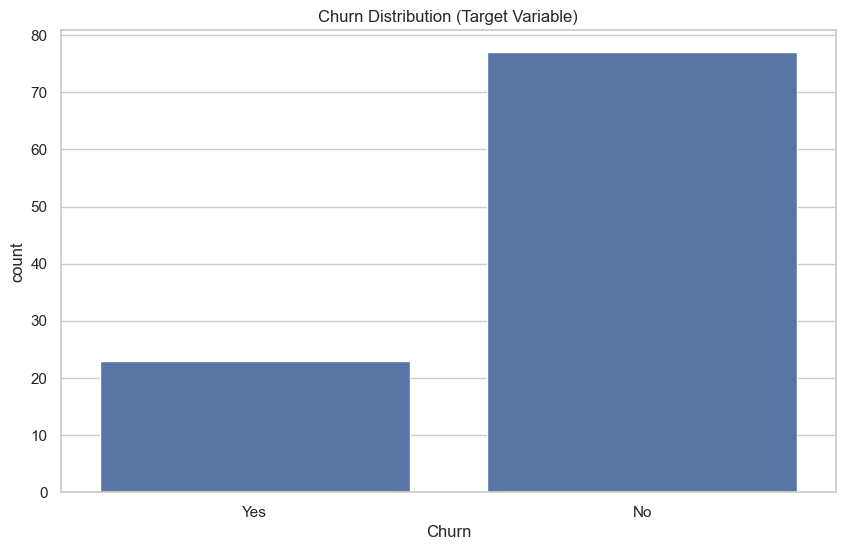

In [25]:
# Analyze 'Churn' (Target Variable - VERY IMPORTANT)
print("\nChurn Value Counts:")
print(df['Churn'].value_counts())
print("\nChurn Percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (Target Variable)')
plt.show()
# Observation: Check if the classes are imbalanced (e.g., many more 'No' than 'Yes')

## Step 4 - Bivariate Analysis (Analyzing Pairs of Variables)
**Goal:** Understand the relationship between two variables. This is crucial for identifying potential predictors of the target variable (Churn) and understanding interactions.  
There are 3 types of Relationships:
- Numerical vs. Numerical
- Categorical vs. Categorical
- Numerical vs. Categorical

In [6]:
# Let's first see numerical vs numerical
# Goal: Check for correlation/association.
# Visualization: Scatter Plot, Correlation Heatmap.
# Metrics: Correlation coefficient (e.g., Pearson's r).

df.corr(numeric_only=True)

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,-0.108194,-0.068476
MonthlyCharges,-0.108194,1.000000,-0.106048
TotalCharges,-0.068476,-0.106048,1.000000


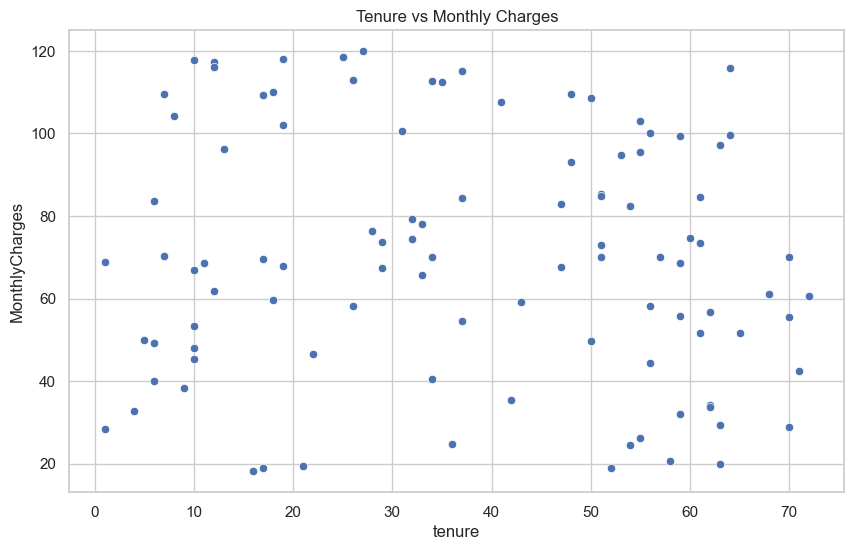

-0.10819413565994006


In [10]:
sns.scatterplot(data=df, x="tenure", y="MonthlyCharges")
plt.title("Tenure vs Monthly Charges")
plt.show()
print(df["tenure"].corr(df["MonthlyCharges"]))

No correlation

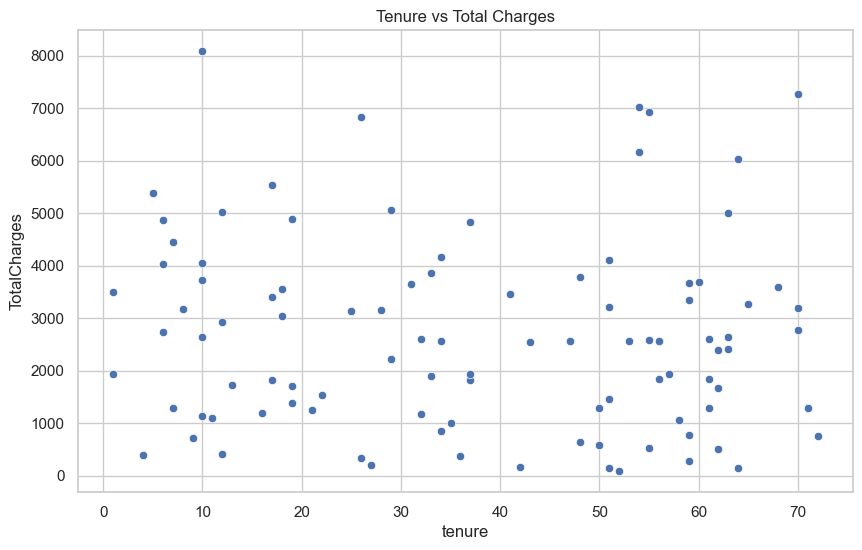

-0.06847569715754234


In [11]:
sns.scatterplot(data=df, x="tenure", y="TotalCharges")
plt.title("Tenure vs Total Charges")
plt.show()
print(df["tenure"].corr(df["TotalCharges"]))

No correlation

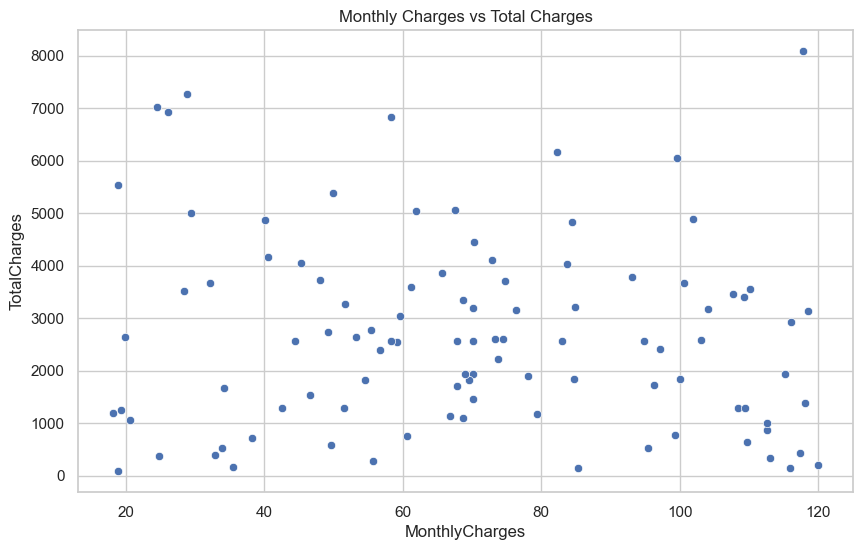

-0.10604772085799068


In [12]:
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges")
plt.title("Monthly Charges vs Total Charges")
plt.show()
print(df["MonthlyCharges"].corr(df["TotalCharges"]))

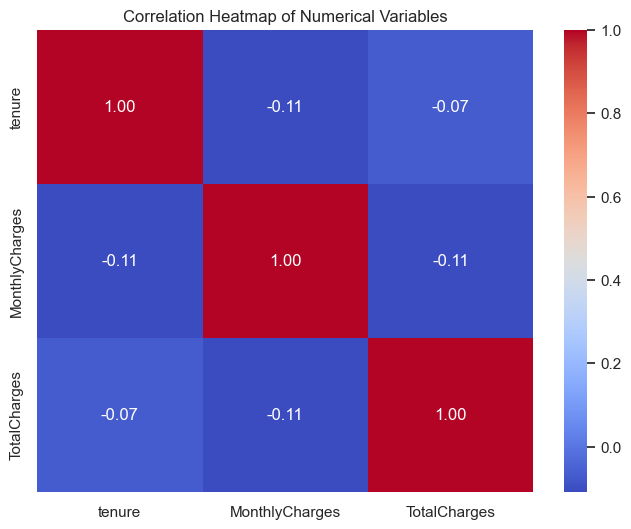

In [13]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

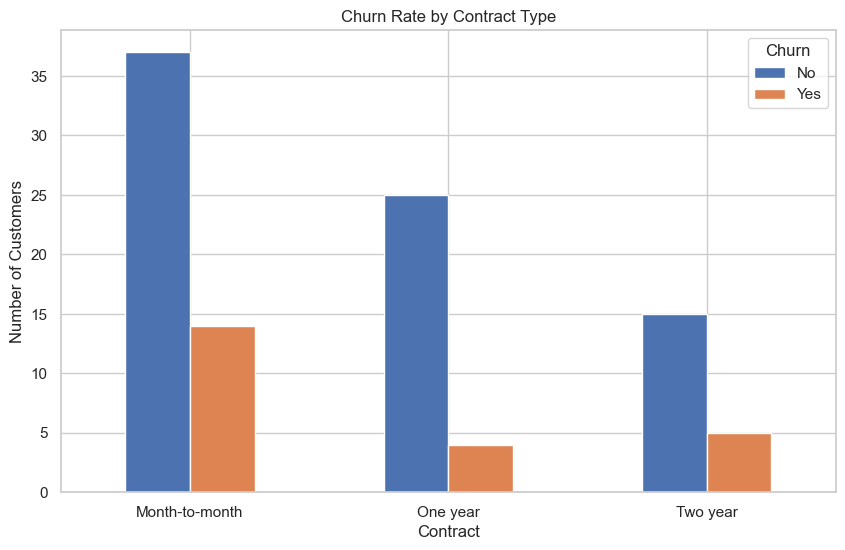

In [14]:
# Now let's see Categorical vs. Categorical
# Goal: See how categories of one variable are distributed within categories of another. 
# Especially important: How does Churn relate to other categorical features?
# Visualization: Grouped/Stacked Bar Charts, Heatmap of Crosstab.
# Metrics: Cross-tabulation (pd.crosstab), Chi-squared test (for statistical significance, often a later step).

# Churn vs. Contract Type
pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar', stacked=False) # Grouped bar chart
plt.title('Churn Rate by Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


Crosstab: Internet Service vs Churn
Churn            No  Yes
InternetService         
DSL              27    5
Fiber optic      37    9
No               13    9

Normalized Crosstab (Row Percentage): Internet Service vs Churn
Churn                   No        Yes
InternetService                      
DSL              84.375000  15.625000
Fiber optic      80.434783  19.565217
No               59.090909  40.909091


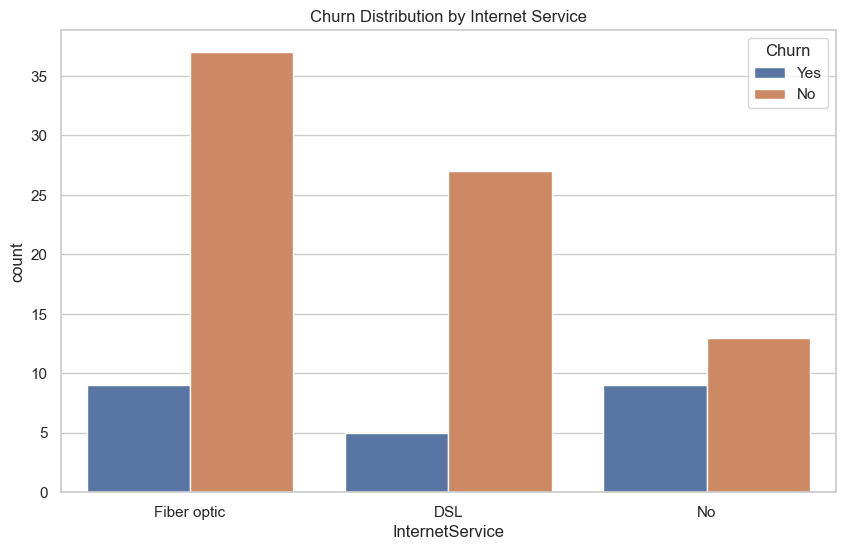

In [16]:
# Churn vs. Internet Service
# Crosstabulation to see counts
print("\nCrosstab: Internet Service vs Churn")
print(pd.crosstab(df['InternetService'], df['Churn']))

# Normalized crosstab to see percentages within each Internet Service type
print("\nNormalized Crosstab (Row Percentage): Internet Service vs Churn")
print(pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100)

sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn Distribution by Internet Service')
plt.show()

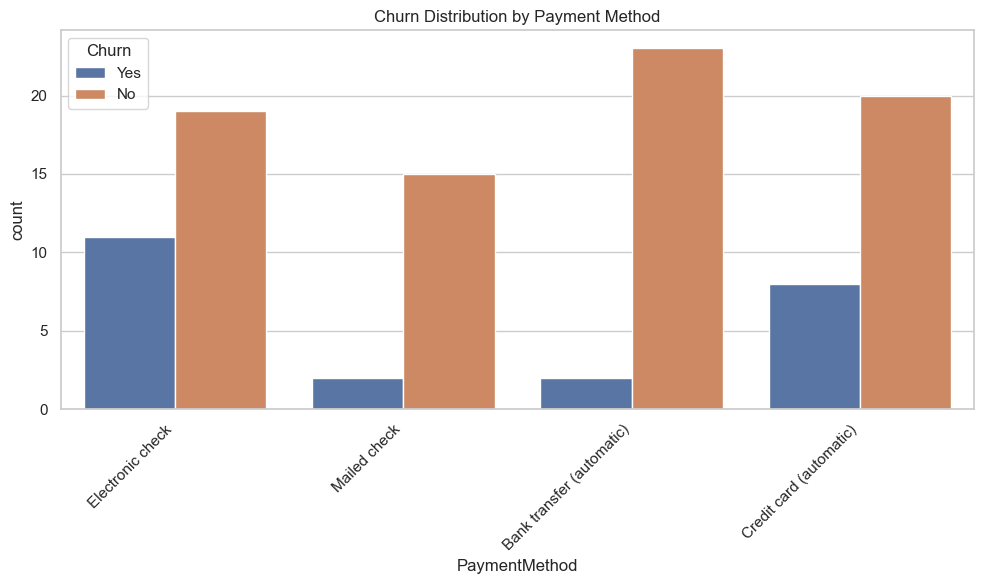

In [17]:
# Churn vs. Payment Method
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn Distribution by Payment Method')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

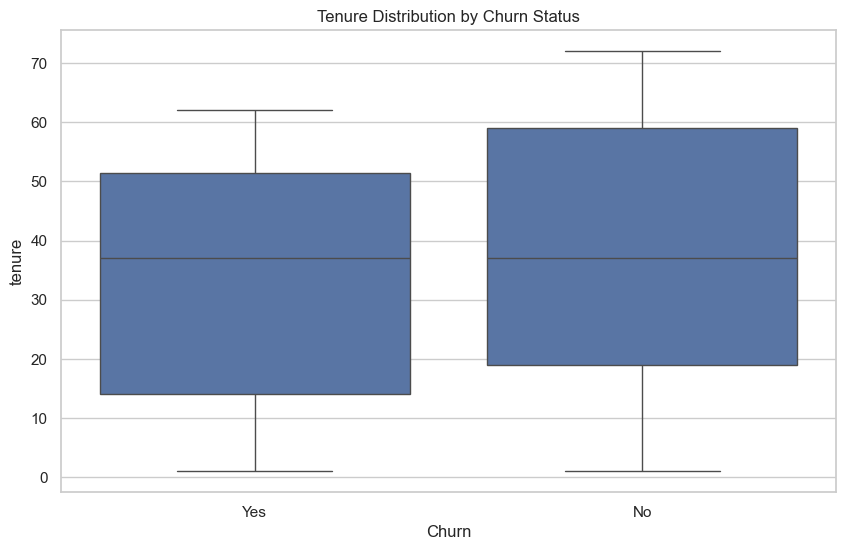

In [18]:
# Now let's see Numerical vs. Caregorical column
# Goal: Compare the distribution of a numerical variable across different categories. 
# Especially important: How do numerical features differ for Churn='Yes' vs 'No'?
# Visualization: Box Plots (per category), Violin Plots, Bar Plots (showing mean/median per category).
# Metrics: Grouped statistics (e.g., df.groupby('Category')['Numeric'].mean()).

# Churn vs. Tenure
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure Distribution by Churn Status')
plt.show()

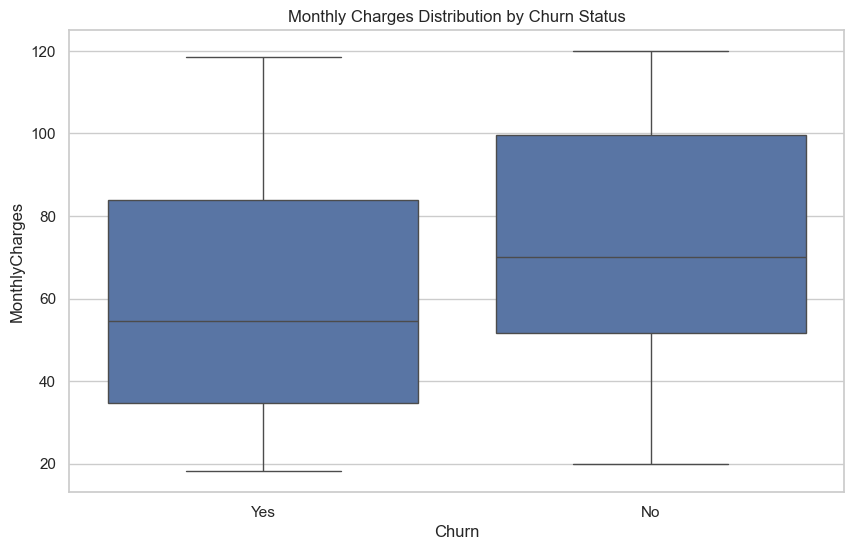

In [19]:
# Churn vs. MonthlyCharges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution by Churn Status')
plt.show()

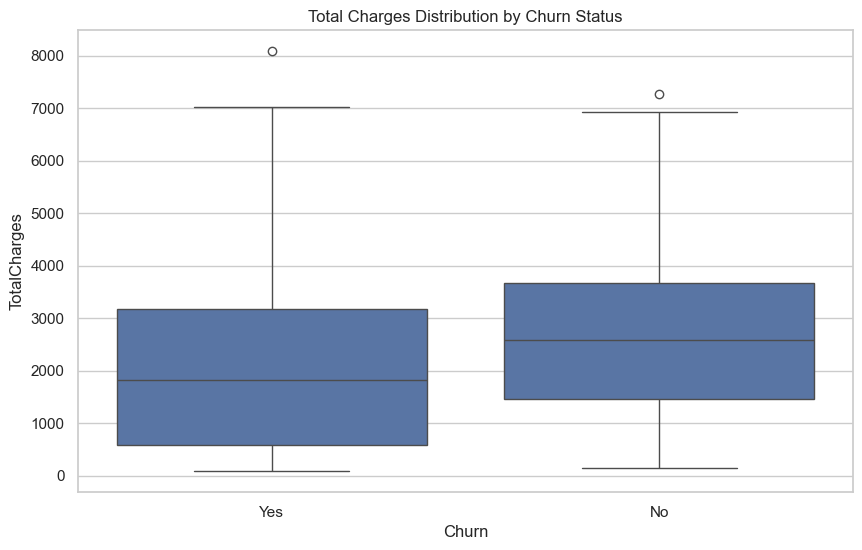

In [20]:
# Churn vs. TotalCharges
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges Distribution by Churn Status')
plt.show()

In [21]:
# Compare mean values
print("\nMean values by Churn status:")
df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()


Mean values by Churn status:


,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,38.831169,73.290307,2777.134026
Yes,33.347826,59.352174,2317.724783


## Step 5 - Multivariate Analysis (Analyzing Multiple Variables Simultaneously - Optional/Advanced EDA)
**Goal:** Explore interactions between three or more variables. This can reveal more complex patterns.

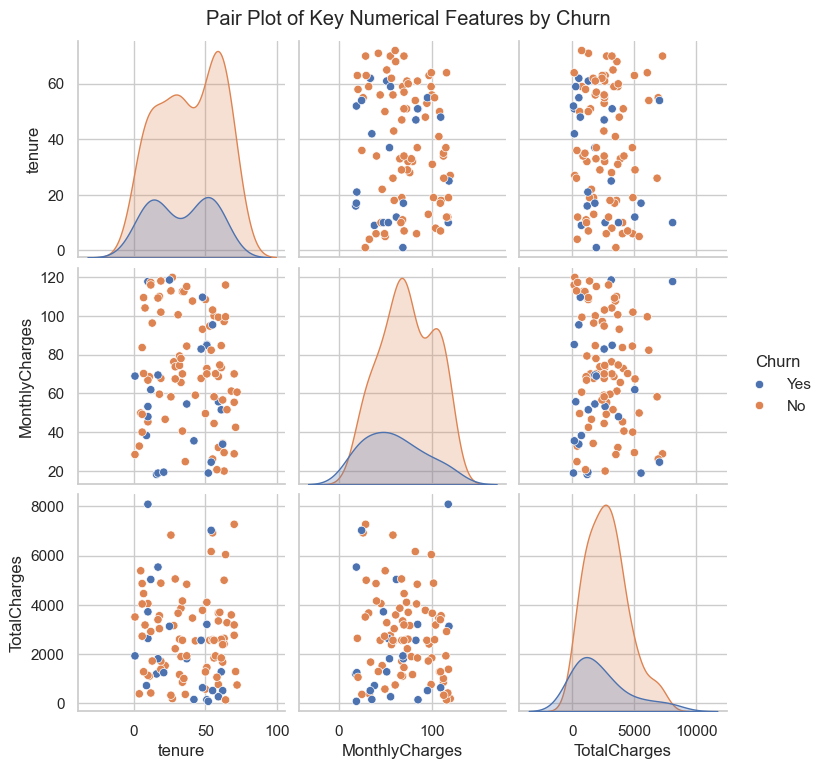

In [22]:
# Pair Plots: Visualize pairwise relationships between numerical variables, 
# potentially colored by a categorical variable (like Churn).
# Select a subset of numerical columns + the target for clarity
cols_for_pairplot = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
sns.pairplot(df[cols_for_pairplot], hue='Churn', diag_kind='kde') # Use kde for diagonal plots
plt.suptitle('Pair Plot of Key Numerical Features by Churn', y=1.02) # Adjust title position
plt.show()

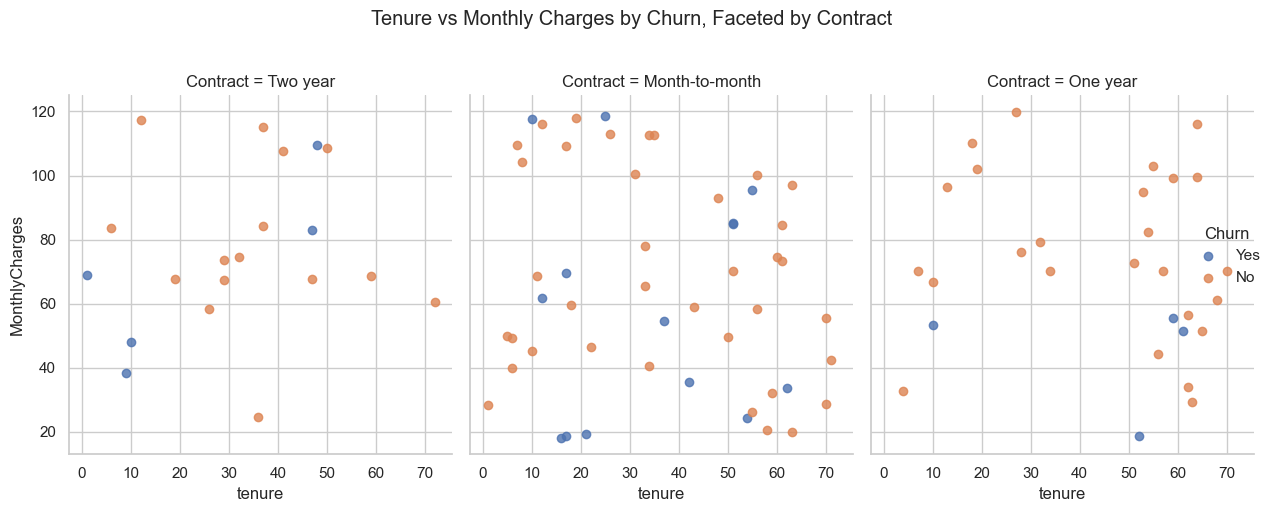

In [23]:
# Scatter Plots with Hue/Size: Add a third (categorical) or fourth (numerical, using size) dimension to scatter plots.
# Tenure vs MonthlyCharges, colored by Churn, faceted by Contract type
sns.lmplot(x='tenure', y='MonthlyCharges', data=df, hue='Churn', col='Contract', aspect=0.8, height=5, fit_reg=False) # Use lmplot for easy faceting
plt.suptitle('Tenure vs Monthly Charges by Churn, Faceted by Contract', y=1.02)
plt.tight_layout()
plt.show()

## Step 6 - Summarize Findings & Communicate Insights
**Goal:** Consolidate what you've learned into actionable insights or hypotheses.
1. **Document Key Observations:** Write down the most important findings from each step. Use bullet points.
    - Example: "Dataset contains X rows, Y columns. Target variable 'Churn' has Z% imbalance."
    - Example: "'TotalCharges' required conversion to numeric and imputation of N missing values (likely new customers)."
    - Example: "Customers with Month-to-Month contracts, Fiber optic internet, and Electronic check payment methods show significantly higher churn rates."
    - Example: "Churned customers tend to have lower tenure and higher monthly charges."
    - Example: "Strong positive correlation observed between 'tenure' and 'TotalCharges'."

2. **Identify Potential Feature Engineering Ideas:** Based on relationships, can you create new features?
    - Example: Create tenure groups (e.g., 0-12 months, 13-24 months, etc.).
    - Example: Calculate ratio of MonthlyCharges to TotalCharges.

3. **Formulate Hypotheses:** State clear hypotheses based on the data.
    - Example: "Hypothesis: Improving tech support for Fiber optic customers might reduce churn."

4. **Suggest Next Steps:** What should be done next? Further analysis? Data preparation for modeling? Which models might be suitable?
    - Example: "Next steps: Handle class imbalance for 'Churn', encode categorical features, build a classification model (e.g., Logistic Regression, Random Forest) to predict churn."

## How this Solves Your Problem:
1. **Structure:** Following these steps gives you a clear roadmap. You know what to do next.

2. **Purposeful Visualization:** You're not just plotting randomly. Each plot type answers specific questions:
    - Distribution of one variable? -> Histogram, Box Plot, Count Plot.
    - Relationship between two numbers? -> Scatter Plot, Heatmap.
    - Relationship between two categories? -> Grouped/Stacked Bar Chart, Crosstab.
    - How a number changes across categories? -> Box Plot, Violin Plot.
3. **Iterative Process:** Findings in one step guide the next. If TotalCharges is object, Step 1 tells you, Step 2 fixes it, Step 3/4 analyze it. If Univariate shows skewness, Bivariate might use median instead of mean.

4. **Start with Questions:** Although structured, always keep business questions in mind (e.g., "What drives churn?"). Frame your analysis around answering these questions within the structured steps. For example, when doing Bivariate analysis, prioritize analyzing features against the Churn variable.

## Modality (in detail)
Modality refers to the number of peaks (modes) observed in the distribution of a variable. Seeing whether a variable's distribution has one, two, or more peaks is a key insight from Exploratory Data Analysis (EDA), particularly when looking at histograms or density plots (KDEs).  
Here's a breakdown of the different types of modality and their effects:
### 1. Unimodal Distribution (One Peak)
- **What it looks like:** The histogram or KDE plot shows a single, distinct peak, indicating the most frequent or typical range of values.
- **What it suggests:** The data tends to cluster around a single central value. There's one dominant group or process generating the data.
- **Effect on Analysis:**
    - *Simpler Interpretation:* Unimodal distributions are often easier to summarize and interpret.
    - *Meaningful Central Tendency:* Measures like the mean, median, and mode often fall close to each other (especially if the distribution is also symmetric) and provide a good representation of the "typical" value.
    - *Standard Deviation:* The standard deviation gives a reasonable measure of spread around that single central point.
    - *Modeling:* Many standard statistical models (like basic linear regression assuming normally distributed errors) work well or are based on the assumption of unimodality.
- **Example:** Heights of adult males within a specific, relatively homogenous population; exam scores that are well-designed to follow a standard curve. In our telecom context, tenure might be unimodal if most churn happens early, creating a single peak at low tenure values, though it could also be right-skewed.

### 2. Bimodal Distribution (Two Peaks)
- **What it looks like:** The histogram or KDE plot shows two distinct peaks, with a valley in between.
- **What it suggests:** This is often a strong indicator that your dataset contains two different underlying subgroups or populations, each with its own central tendency. The data isn't homogenous.
- **Effect on Analysis:**
    - *Misleading Summary Statistics:* The overall mean or median might fall in the valley between the two peaks. This summary statistic would represent a value that is actually relatively uncommon in the data and doesn't accurately reflect either subgroup's typical value. Relying solely on .describe() could completely hide this important feature.
    - *Signal for Segmentation:* The immediate next step should be to investigate why there are two peaks. Is there another variable in your dataset that separates these two groups? For instance, if you plot heights for a mixed-gender group, you'll likely see a bimodal distribution (one peak for typical female heights, one for typical male heights). Plotting MonthlyCharges could potentially be bimodal if there are very distinct and popular "basic" and "premium" plan price points.
    - *Modeling Implications:* Standard models assuming a single distribution might perform poorly. You might need to:
        - Segment the data based on the identifying factor (if found) and model each subgroup separately.
        - Use mixture models designed to handle multiple distributions.
    - *Crucial to Visualize:* Bimodality is often only apparent through visualization (histograms, KDE plots).

### 3. Multimodal Distribution (More Than Two Peaks)
- **What it looks like:** The histogram or KDE plot shows three or more distinct peaks.
- **What it suggests:** This indicates the presence of multiple underlying subgroups or processes within the data. It can also sometimes arise from discrete data with a few very popular values, or from combining data from very different sources.
- **Effect on Analysis:**
    - *Highly Misleading Summary Statistics:* The overall mean or median becomes even less representative of any typical value.
    - *Complex Structure:* Signals a complex underlying structure. Identifying the factors causing the different peaks is essential but can be challenging.
    - *Potential Artifacts:* Check if the modality is an artifact of binning in histograms or data granularity (e.g., rounding effects).
    - *Advanced Techniques:* Understanding and modeling multimodal data might require clustering techniques or more sophisticated statistical models capable of handling multiple modes.
- **Example:** Daily website traffic (peaks for morning, afternoon, evening); customer spending patterns across different product categories if plotted together; combining survey results from populations with very different opinions.

### In Summary:
- **Detecting Modality:** Use histograms and KDE plots during EDA.
- **Impact on Summary Statistics:** Bimodal and multimodal distributions make standard measures of central tendency (mean, median) less reliable or even misleading as single summary points.
- **Signal for Heterogeneity:** Modality (especially bimodal/multimodal) strongly suggests your data is not homogenous and likely contains distinct subgroups.
- **Guides Further Analysis:** Identifying modality prompts you to investigate what defines these subgroups (segmentation) by exploring relationships with other variables.
- **Influences Modeling:** The modality of your variables (especially the target variable in some cases, or key predictors) influences the type of statistical models that will be appropriate and perform well. Ignoring significant modality can lead to poor model fit and inaccurate conclusions.